<a href="https://colab.research.google.com/github/joony0512/Stastistics_and_MachineLearning/blob/main/%EA%B1%B4%EC%84%A4%EA%B8%B0%EA%B3%84%EC%98%A4%EC%9D%BC%EC%83%81%ED%83%9C%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8%EC%A0%81%ED%95%A9_Adasyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## train

In [43]:
# CSV 파일을 불러와 데이터프레임으로 저장합니다.
df = pd.read_csv('/content/drive/MyDrive/2023년 4학년 2학기/머신러닝PBL/train.csv')
# 데이터프레임의 첫 5개 행을 출력합니다.
df.head()


,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [44]:
# 데이터프레임의 정보를 출력합니다.
# show dataframe for each features that we have
dataFeatures = []
dataType     = []
null         = []
nullPCT      = []
unique       = []
minValue     = []
maxValue     = []
uniqueSample = []


for item in list(df):
    dataFeatures.append(item)

for item in dataFeatures:
    dataType.append(df[item].dtype.name)
    
for item in dataFeatures:
    null.append(len(df[df[item].isnull() == True]))

for item in dataFeatures:
    nullPCT.append(round(len(df[df[item].isnull() == True])/len(df[item])*100,2))
    
for item in dataFeatures:
    minValue.append(df[item].min())

for item in dataFeatures:
    maxValue.append(df[item].max())

for item in dataFeatures:
    unique.append(df[item].nunique())

for item in dataFeatures:
    uniqueSample.append(df[item].unique()[0:2])

train_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
    'uniqueSample':uniqueSample
})
train_info

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue,uniqueSample
0,ID,object,0,0.00,14095,TRAIN_00000,TRAIN_14094,"[TRAIN_00000, TRAIN_00001]"
1,COMPONENT_ARBITRARY,object,0,0.00,4,COMPONENT1,COMPONENT4,"[COMPONENT3, COMPONENT2]"
2,ANONYMOUS_1,int64,0,0.00,2951,1000,294451,"[1486, 1350]"
3,YEAR,int64,0,0.00,16,2007,2022,"[2011, 2021]"
4,SAMPLE_TRANSFER_DAY,int64,0,0.00,107,0,368,"[7, 51]"
5,ANONYMOUS_2,int64,0,0.00,842,200,9650,"[200, 375]"
6,AG,int64,0,0.00,4,0,3,"[0, 1]"
7,AL,int64,0,0.00,328,0,4630,"[3, 2]"
8,B,int64,0,0.00,504,0,2051,"[93, 19]"
9,BA,int64,0,0.00,38,0,216,"[0, 1]"


In [45]:
# COMPONENT_ARBITRARY 변수의 분포를 확인합니다.
df['COMPONENT_ARBITRARY'].value_counts()


COMPONENT3    7050
COMPONENT1    3890
COMPONENT2    2316
COMPONENT4     839
Name: COMPONENT_ARBITRARY, dtype: int64

## test

In [46]:
test_df = pd.read_csv('/content/drive/MyDrive/2023년 4학년 2학기/머신러닝PBL/test.csv')

In [47]:
test_df.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469


In [48]:
# show dataframe for each features that we have
dataFeatures = []
dataType     = []
null         = []
nullPCT      = []
unique       = []
minValue     = []
maxValue     = []
uniqueSample = []


for item in list(test_df):
    dataFeatures.append(item)

for item in dataFeatures:
    dataType.append(test_df[item].dtype.name)
    
for item in dataFeatures:
    null.append(len(test_df[test_df[item].isnull() == True]))

for item in dataFeatures:
    nullPCT.append(round(len(test_df[test_df[item].isnull() == True])/len(test_df[item])*100,2))
    
for item in dataFeatures:
    minValue.append(test_df[item].min())

for item in dataFeatures:
    maxValue.append(test_df[item].max())

for item in dataFeatures:
    unique.append(test_df[item].nunique())

for item in dataFeatures:
    uniqueSample.append(test_df[item].unique()[0:2])

test_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
    'uniqueSample':uniqueSample
})

test_info

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue,uniqueSample
0,ID,object,0,0.0,6041,TEST_0000,TEST_6040,"[TEST_0000, TEST_0001]"
1,COMPONENT_ARBITRARY,object,0,0.0,4,COMPONENT1,COMPONENT4,"[COMPONENT1, COMPONENT3]"
2,ANONYMOUS_1,int64,0,0.0,2264,1000,239570,"[2192, 2794]"
3,YEAR,int64,0,0.0,16,2007,2022,"[2016, 2011]"
4,ANONYMOUS_2,int64,0,0.0,629,200,9650,"[200, 473]"
5,AG,int64,0,0.0,3,0,2,"[0, 1]"
6,CO,int64,0,0.0,6,0,13,"[0, 1]"
7,CR,int64,0,0.0,80,0,1415,"[0, 2]"
8,CU,int64,0,0.0,374,0,4113,"[1, 16]"
9,FE,int64,0,0.0,891,0,30407,"[12, 278]"


## Original Feature 분석

In [49]:
print(df.shape)
print(test_df.shape)

(14095, 54)
(6041, 19)


### train data column

> Train 데이터의 각 Feature는 다음과 같은 의미를 가지고 있습니다.
*   `ID` : ID
*   `COMPONENT_ARBITRARY` : sample 오일 관련 부품 (Component 4종)
*   `ANONYMOUS_1` : 무명 Feature 1, 수치형 데이터
*   `YEAR` : 오일 진단 년도(Year)
*   `SAMPLE_TRANSFER_DAY` : 오일 샘플링 후 진단 기관으로 이동한 기간(Days)
*   `ANONYMOUS_2` : 무명 Feature 2, 수치형 데이터
*   `AG` : 은(Silver) 함유량
*   `AL` : 알루미늄(Aluminium) 함유량
*   `B` : 붕소(Boron) 함유량
*   `BA` : 바륨(Barium) 함유량
*   `BE` : 베릴륨(Beryllium) 함유량
*   `CA` : 칼슘(Calcium) 함유량
*   `CD` : 카드뮴(Cadmium) 함유량
*   `CO` : 코발트(Cobolt) 함유량
*   `CR` : 크로뮴(Chromium) 함유량
*   `CR` : 구리(Copper) 함유량
*   `FH2O` : 물(Water) 수치(By FT-IR)
*   `FNOX` : 질소산화물(Nox) 수치(By FT-IR)
*   `FOPTIMETHGLY` : 비식별화
*   `FOXID` : 산화(Oxidation) 수치(By FT-IR)
*   `FSO4` : 황산염(S04) 수치(By FT-IR)
*   `FTBN` : 염기성 첨가제물질 수치(By FT-IR)
*   `FE` : 철(Iron) 함유량
*   `FUEL` : 연료 함유량
*   `H2O` : 물 함유량
*   `K` : 칼륨(Potassium) 함유량
*   `LI` : 리튬(Lithium) 함유량
*   `MG` : 마그네슘(Magnesium) 함유량
*   `MN` : 망가니즈(Manganese) 함유량
*   `MO` : 몰리브덴(Molybdenum) 함유량
*   `NA` : 나트륨(Sodium) 함유량
*   `NI` : 니켈(Nickel) 함유량
*   `P` : 인(Phosphorus) 함유량
*   `PB` : 납(Lead) 함유량
*   `PQINDEX` : 입자 정량화 지수(Particle Quantifier Index)
*   `S` : 황(Sulphur) 함유량
*   `SB` : 안티몬(Antimony) 함유량
*   `SI` : 규소(Silicone) 함유량
*   `SN` : 주석(Tin) 함유량
*   `SOOTPERCENTAGE` : 그을음 정도
*   `TI` : 티타늄(Titanium) 함유량
*   `U100` : 100㎛ 이상 입자 크기(Particle Count)
*   `U75` : 75㎛ 이상 입자 크기(Particle Count)
*   `U50` : 50㎛ 이상 입자 크기(Particle Count)
*   `U25` : 25㎛ 이상 입자 크기(Particle Count)
*   `U20` : 20㎛ 이상 입자 크기(Particle Count)
*   `U14` : 14㎛ 이상 입자 크기(Particle Count)
*   `U6` : 6㎛ 이상 입자 크기(Particle Count)
*   `U4` : 4㎛ 이상 입자 크기(Particle Count)
*   `V` : 바나듐(Vanadium) 함유량
*   `V100` : 점도(Viscosity) @ 100 degrees
*   `V40` : 점도(Viscosity) @ 40 degrees
*   `ZN` : 아연(Zinc) 함유량
*   `Y_LABEL` : 오일 정상 여부(0 : 정상, 1 : 이상)




In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

#데이터 전처리

In [51]:
# Y_LABEL을 int형에서 object형으로 변환
df = df.astype({'Y_LABEL' : 'object'})

In [52]:
#인덱스 변경
df.set_index('ID', inplace=True)

In [53]:
#COMPONENT_ARBITRARY컬럼 onehot encoding
one_hot_encoded = pd.get_dummies(df['COMPONENT_ARBITRARY'])
print(one_hot_encoded)

             COMPONENT1  COMPONENT2  COMPONENT3  COMPONENT4
ID                                                         
TRAIN_00000           0           0           1           0
TRAIN_00001           0           1           0           0
TRAIN_00002           0           1           0           0
TRAIN_00003           0           0           1           0
TRAIN_00004           0           0           1           0
...                 ...         ...         ...         ...
TRAIN_14090           0           0           1           0
TRAIN_14091           1           0           0           0
TRAIN_14092           0           0           1           0
TRAIN_14093           0           1           0           0
TRAIN_14094           0           1           0           0

[14095 rows x 4 columns]


In [54]:
#원래 열 제거
df = df.drop('COMPONENT_ARBITRARY', axis =1) #나중에 사용

In [55]:
#새로운 열들 추가
df.insert(0, 'COMPONENT1', one_hot_encoded['COMPONENT1'])
df.insert(1, 'COMPONENT2', one_hot_encoded['COMPONENT2'])
df.insert(2, 'COMPONENT3', one_hot_encoded['COMPONENT3'])
df.insert(3, 'COMPONENT4', one_hot_encoded['COMPONENT4'])
print(df)#나중에사용

             COMPONENT1  COMPONENT2  COMPONENT3  COMPONENT4  ANONYMOUS_1  \
ID                                                                         
TRAIN_00000           0           0           1           0         1486   
TRAIN_00001           0           1           0           0         1350   
TRAIN_00002           0           1           0           0         2415   
TRAIN_00003           0           0           1           0         7389   
TRAIN_00004           0           0           1           0         3954   
...                 ...         ...         ...         ...          ...   
TRAIN_14090           0           0           1           0         1616   
TRAIN_14091           1           0           0           0         2784   
TRAIN_14092           0           0           1           0         1788   
TRAIN_14093           0           1           0           0         2498   
TRAIN_14094           0           1           0           0         1902   

           

## 결측치 확인 및 null 값 처리

In [56]:
df.isnull().sum()/df.shape[0]*100

COMPONENT1              0.000000
COMPONENT2              0.000000
COMPONENT3              0.000000
COMPONENT4              0.000000
ANONYMOUS_1             0.000000
YEAR                    0.000000
SAMPLE_TRANSFER_DAY     0.000000
ANONYMOUS_2             0.000000
AG                      0.000000
AL                      0.000000
B                       0.000000
BA                      0.000000
BE                      0.000000
CA                      0.000000
CD                      9.890032
CO                      0.000000
CR                      0.000000
CU                      0.000000
FH2O                   72.401561
FNOX                   72.401561
FOPTIMETHGLY           72.401561
FOXID                  72.401561
FSO4                   72.401561
FTBN                   72.401561
FE                      0.000000
FUEL                   72.401561
H2O                     0.000000
K                      16.310748
LI                      0.000000
MG                      0.000000
MN        

In [57]:
percent30UP = list(train_info[train_info['nullPCT'] >= 30.0]['dataFeatures'])
df = df.drop(percent30UP,axis=1)


In [58]:
# 결측치 비율이 20 이하인 컬럼들에 대해서만 결측치 처리
for column in df.columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [59]:
df.isnull().sum()/df.shape[0]*100

COMPONENT1             0.0
COMPONENT2             0.0
COMPONENT3             0.0
COMPONENT4             0.0
ANONYMOUS_1            0.0
YEAR                   0.0
SAMPLE_TRANSFER_DAY    0.0
ANONYMOUS_2            0.0
AG                     0.0
AL                     0.0
B                      0.0
BA                     0.0
BE                     0.0
CA                     0.0
CD                     0.0
CO                     0.0
CR                     0.0
CU                     0.0
FE                     0.0
H2O                    0.0
K                      0.0
LI                     0.0
MG                     0.0
MN                     0.0
MO                     0.0
NA                     0.0
NI                     0.0
P                      0.0
PB                     0.0
PQINDEX                0.0
S                      0.0
SB                     0.0
SI                     0.0
SN                     0.0
TI                     0.0
V                      0.0
V40                    0.0
Z

In [60]:
df.columns

Index(['COMPONENT1', 'COMPONENT2', 'COMPONENT3', 'COMPONENT4', 'ANONYMOUS_1',
       'YEAR', 'SAMPLE_TRANSFER_DAY', 'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA',
       'BE', 'CA', 'CD', 'CO', 'CR', 'CU', 'FE', 'H2O', 'K', 'LI', 'MG', 'MN',
       'MO', 'NA', 'NI', 'P', 'PB', 'PQINDEX', 'S', 'SB', 'SI', 'SN', 'TI',
       'V', 'V40', 'ZN', 'Y_LABEL'],
      dtype='object')

In [61]:
print(df.shape)

(14095, 39)


In [62]:
# 제거된 feature list
percent30UP

['FH2O',
 'FNOX',
 'FOPTIMETHGLY',
 'FOXID',
 'FSO4',
 'FTBN',
 'FUEL',
 'SOOTPERCENTAGE',
 'U100',
 'U75',
 'U50',
 'U25',
 'U20',
 'U14',
 'U6',
 'U4',
 'V100']

## columns 정의


In [63]:
categorical_features = ['COMPONENT_ARBITRARY1','COMPONENT_ARBITRARY2','COMPONENT_ARBITRARY3','COMPONENT_ARBITRARY4', 'YEAR', 'Y_LABEL']
numerical_features = [i for i in df.columns if i not in categorical_features]
test_features = [i for i in test_df.columns]

## outlier확인

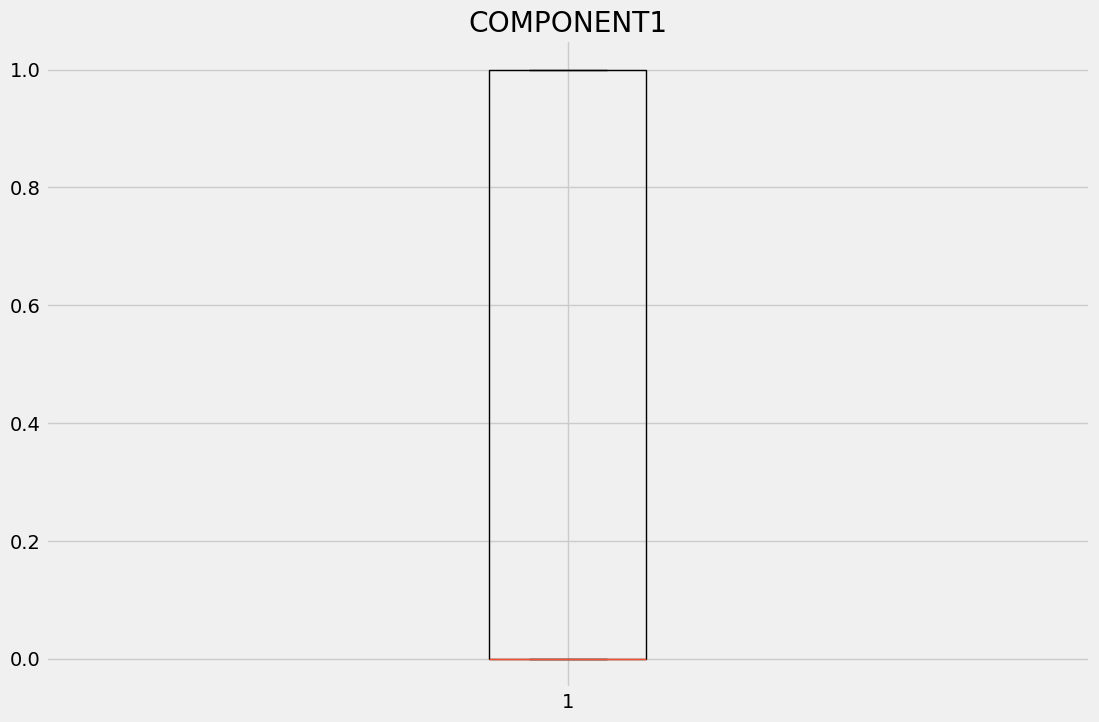

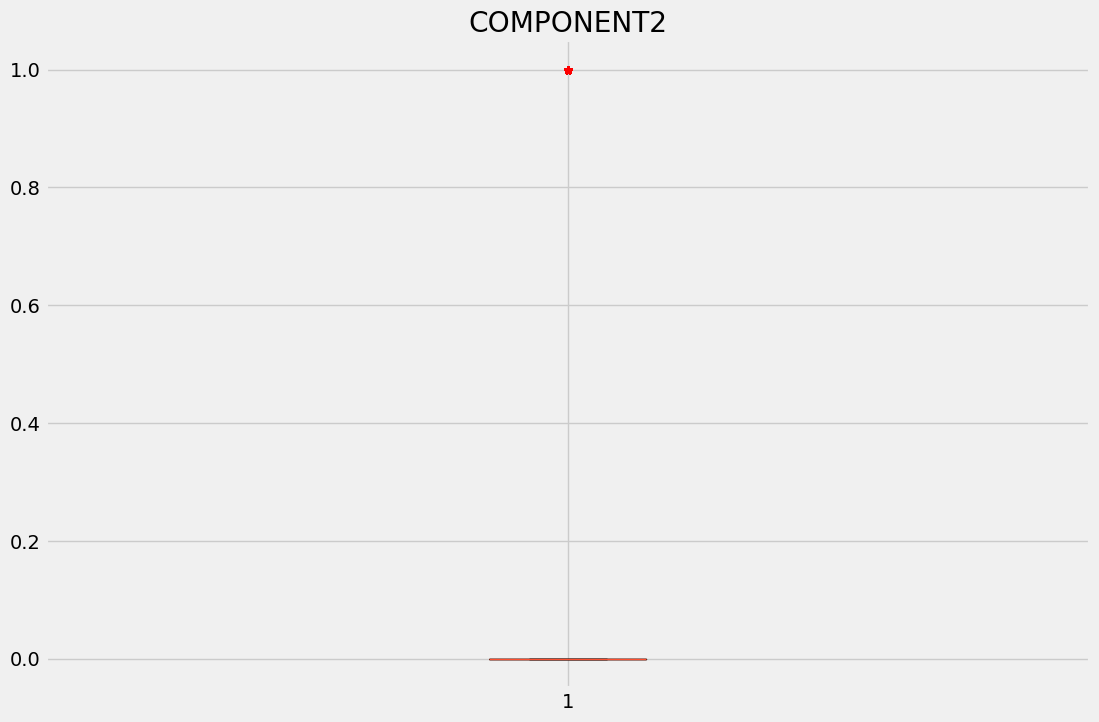

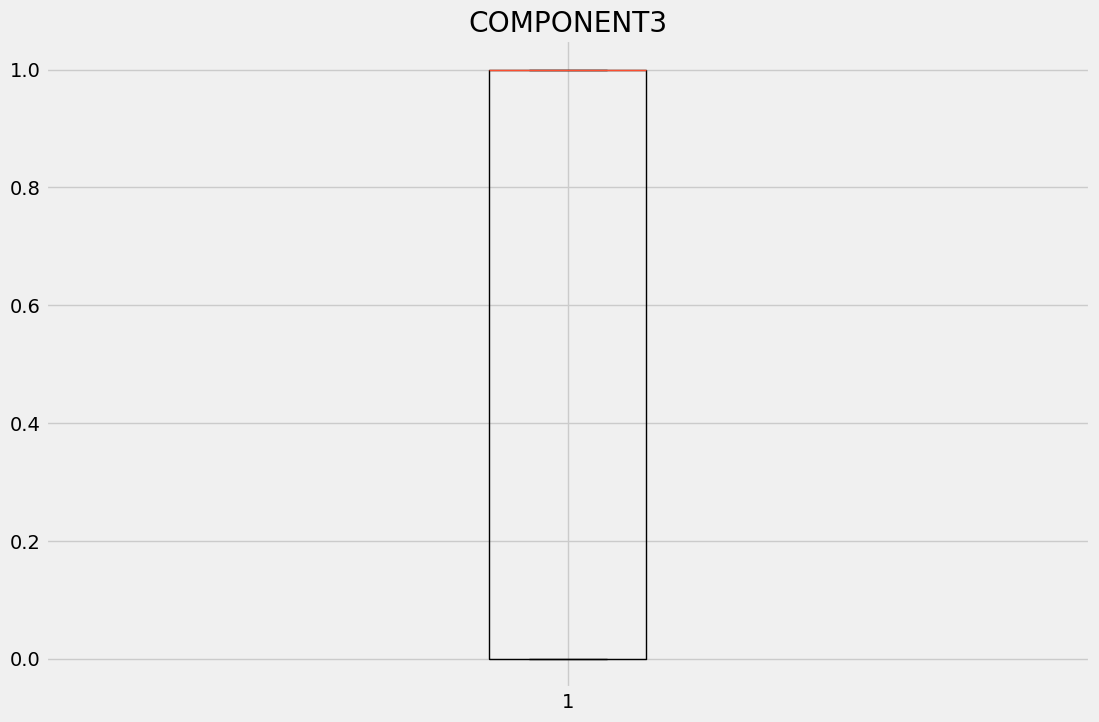

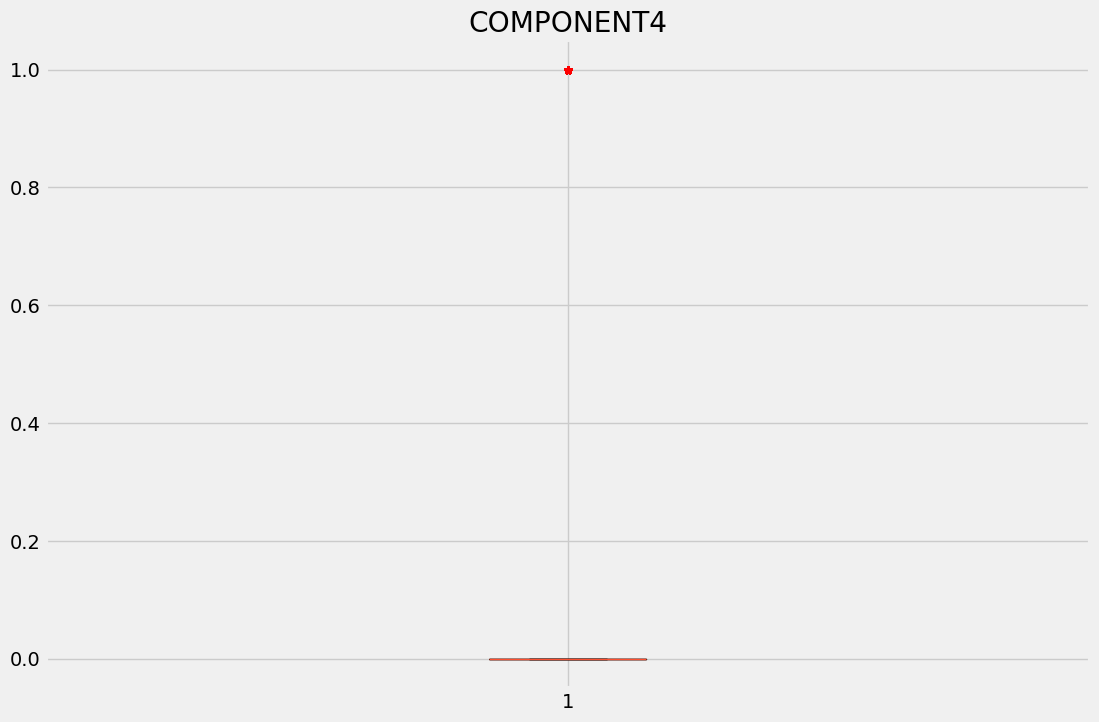

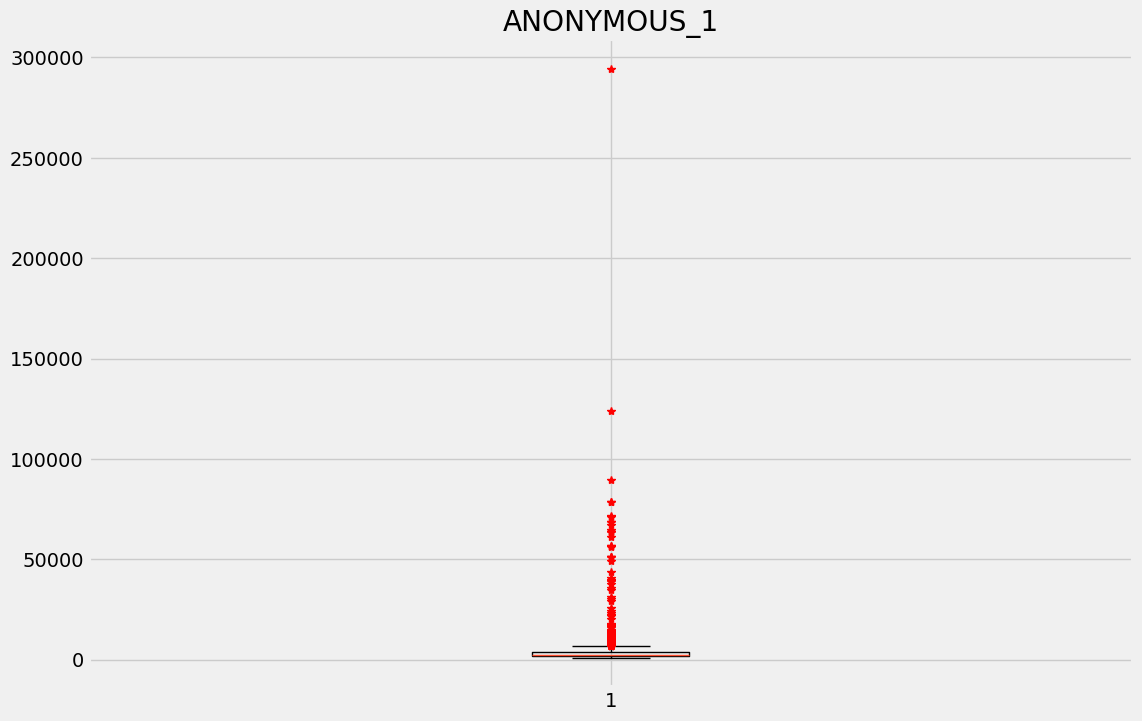

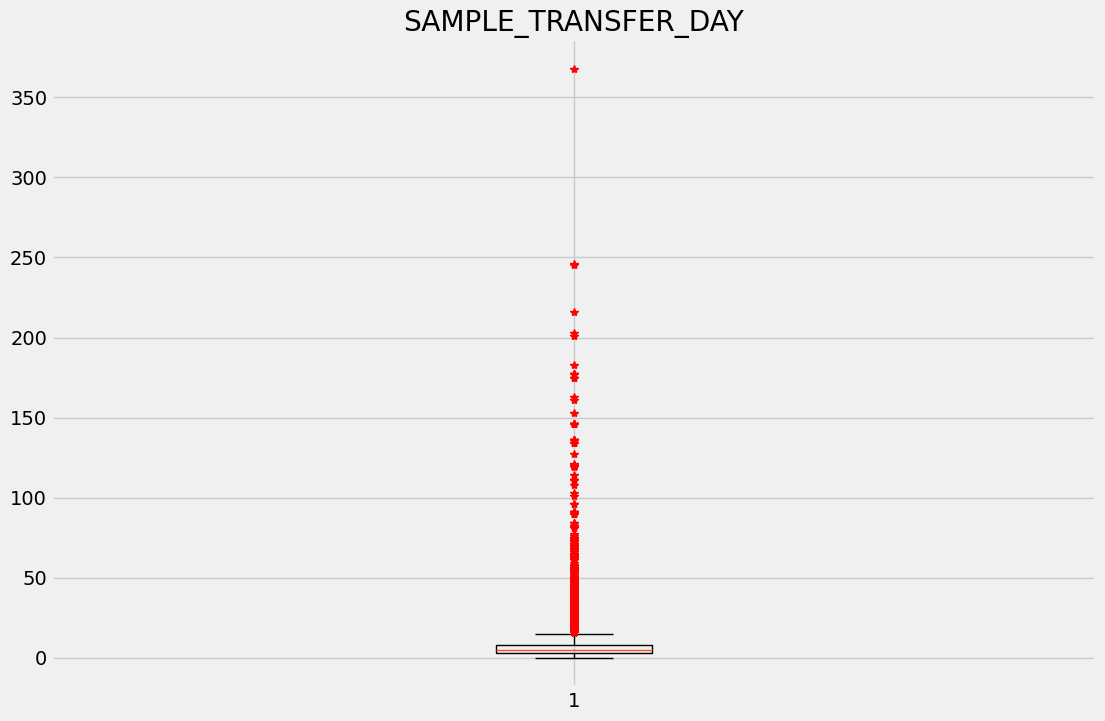

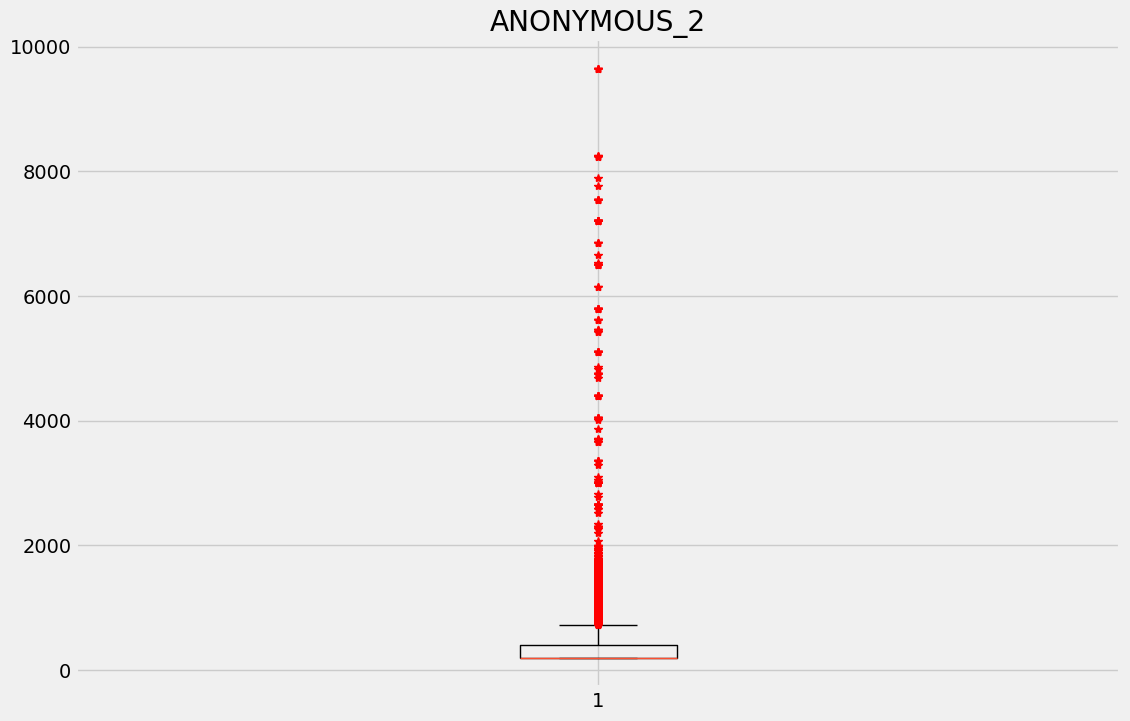

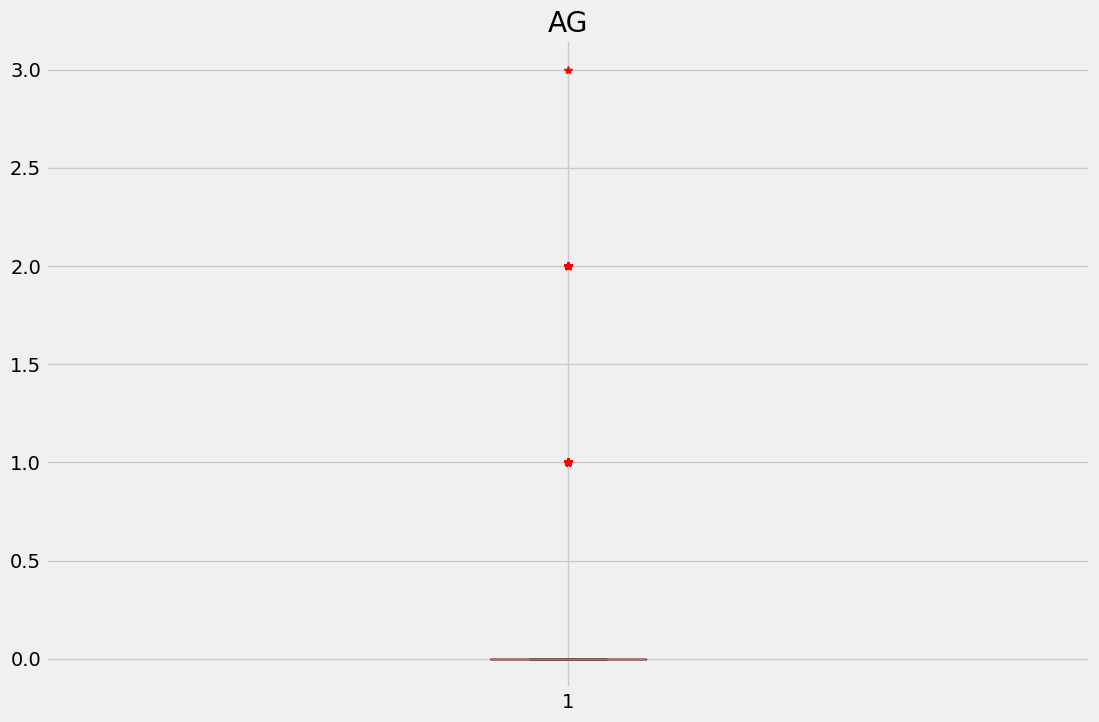

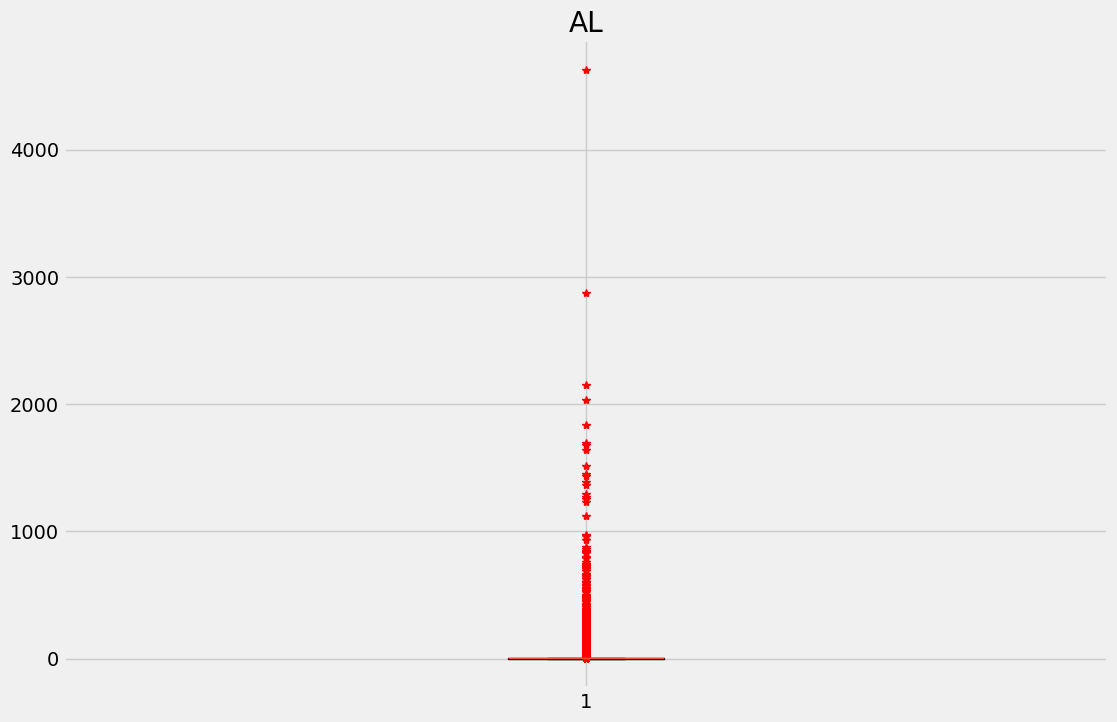

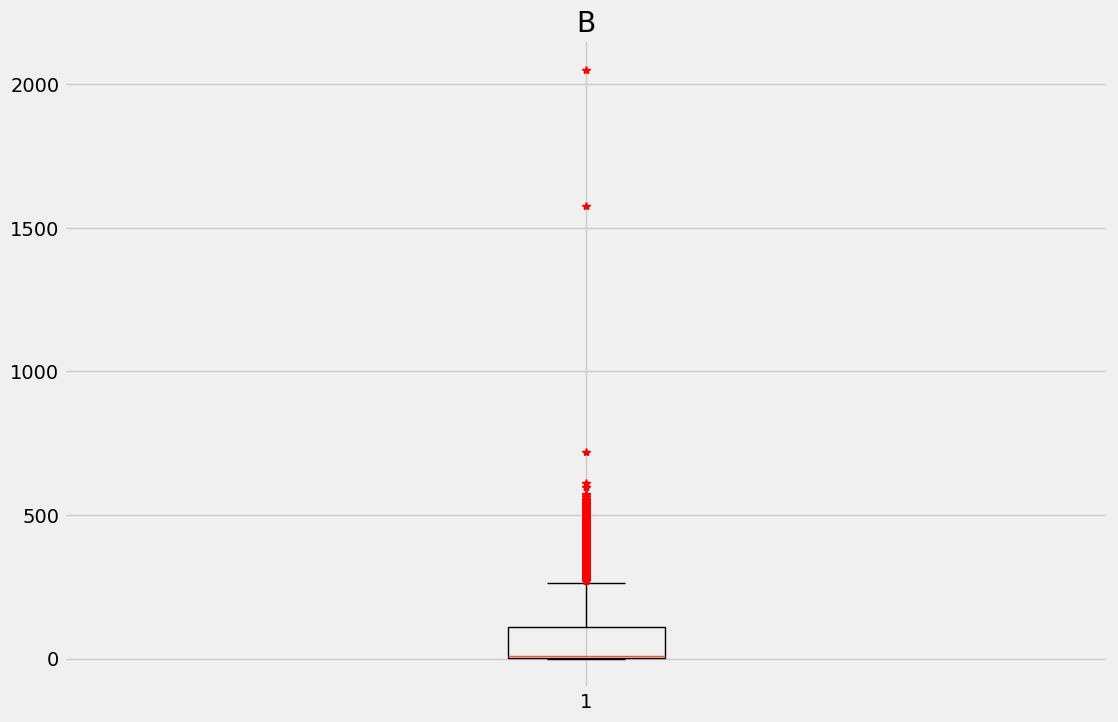

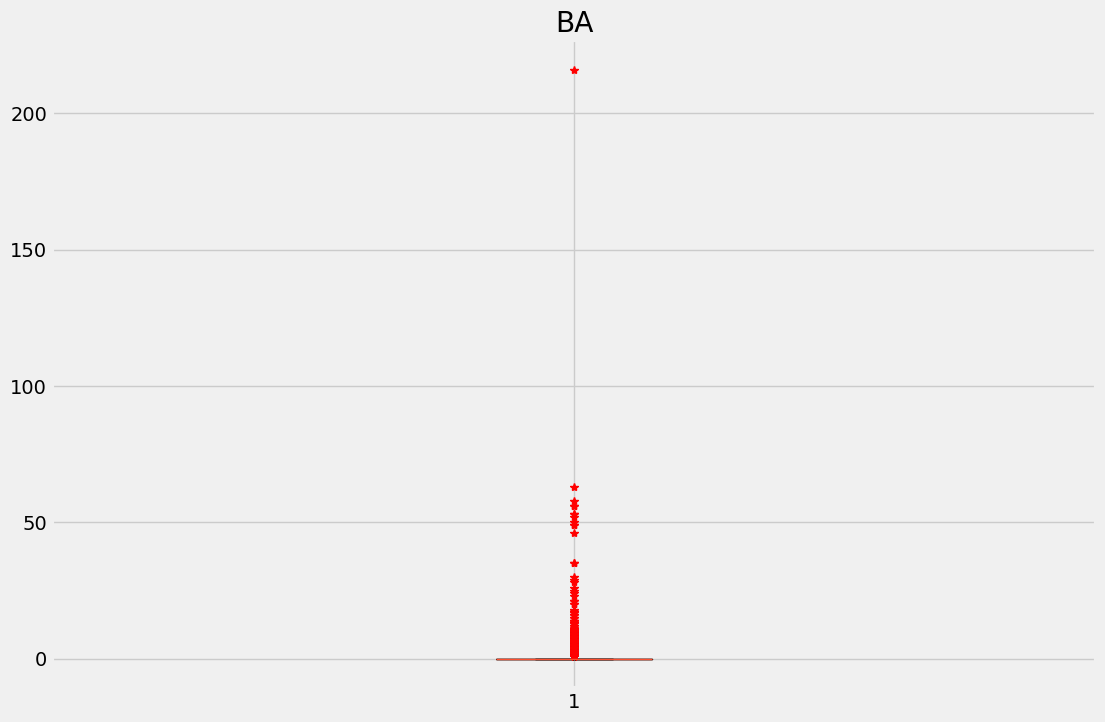

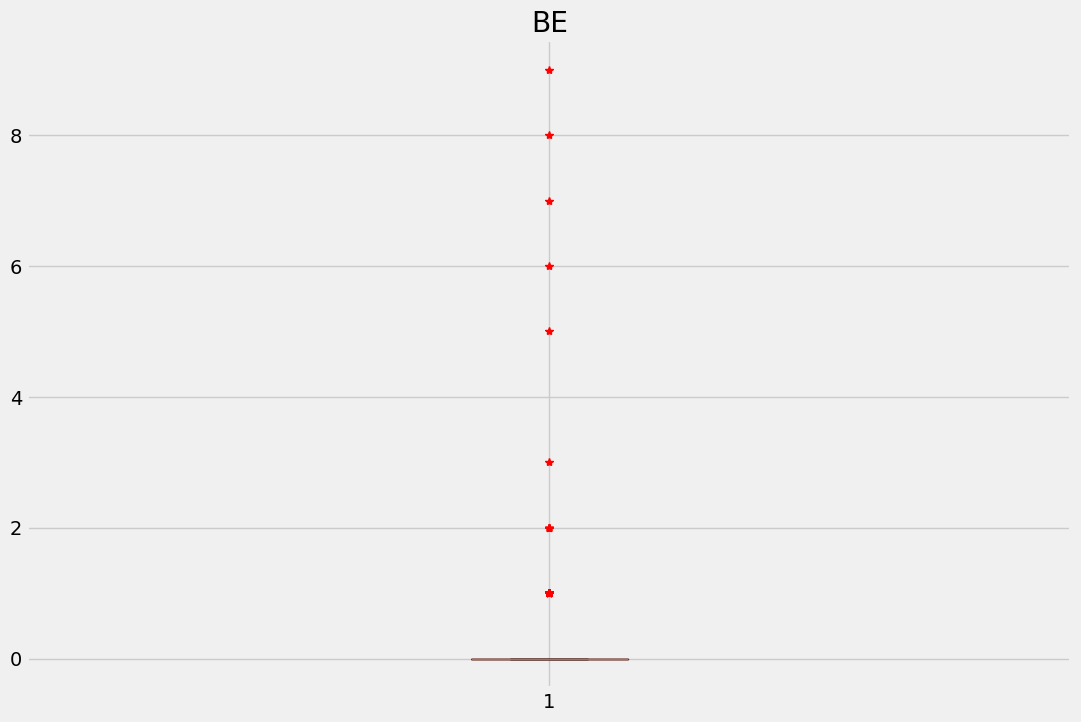

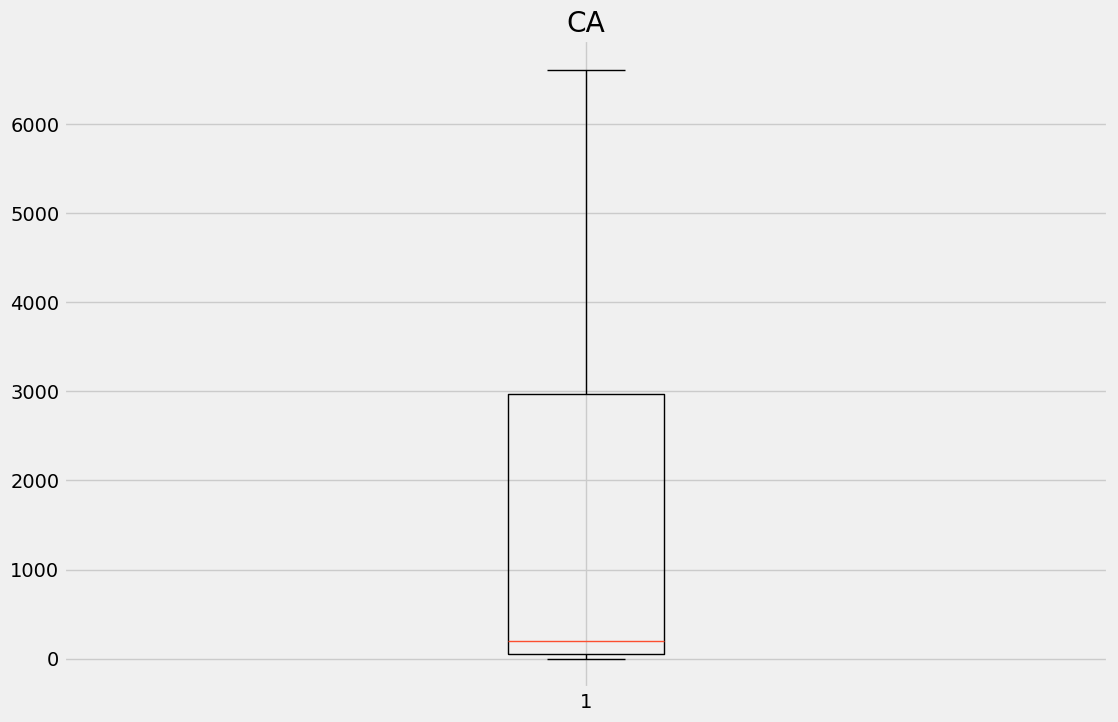

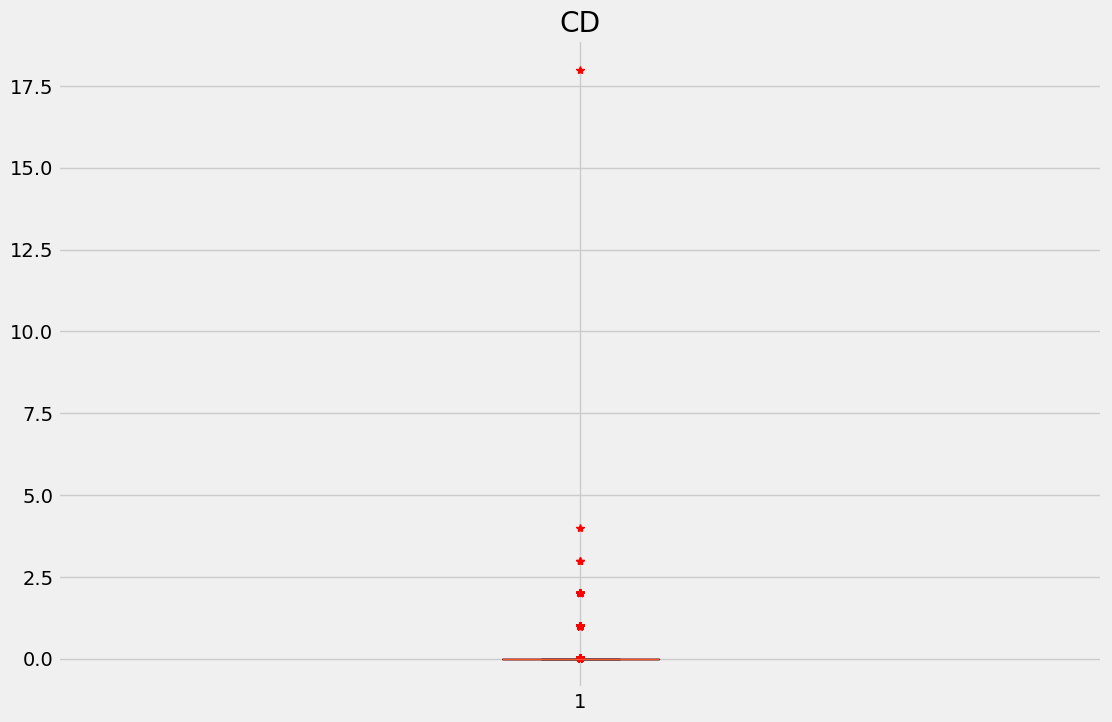

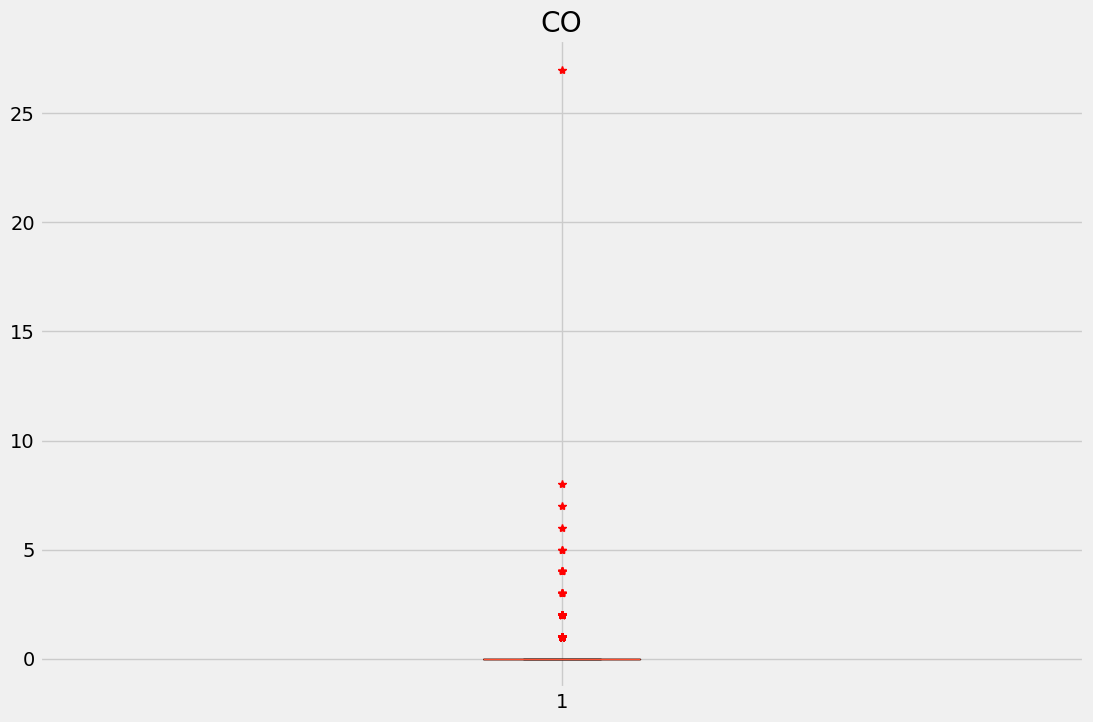

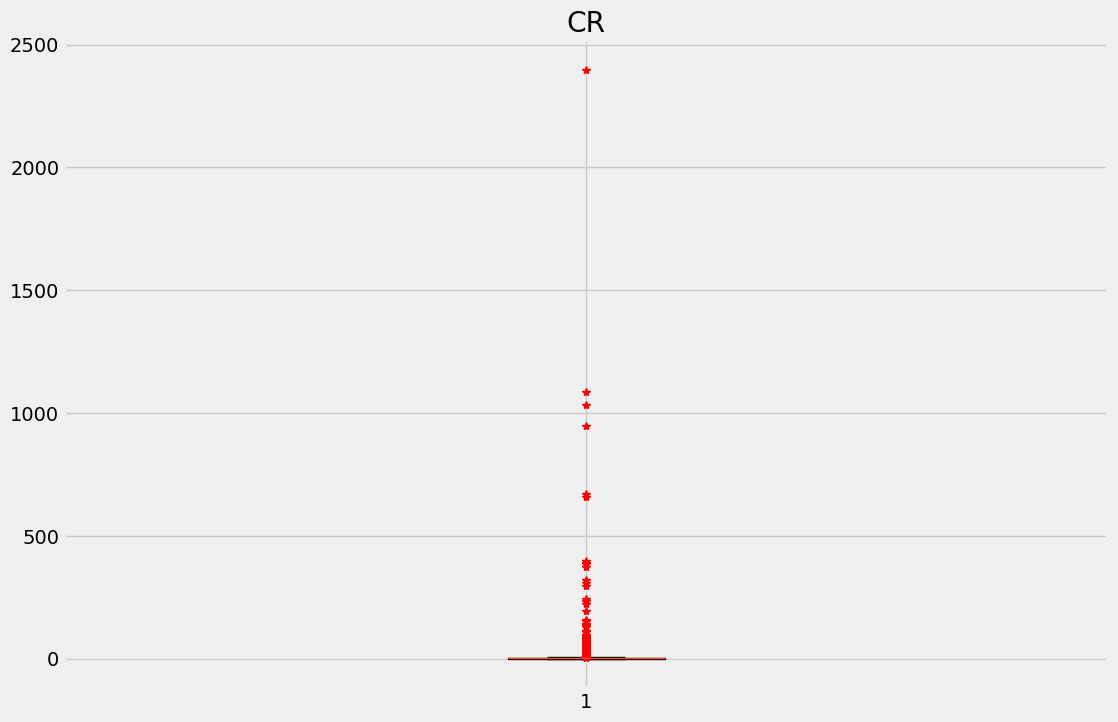

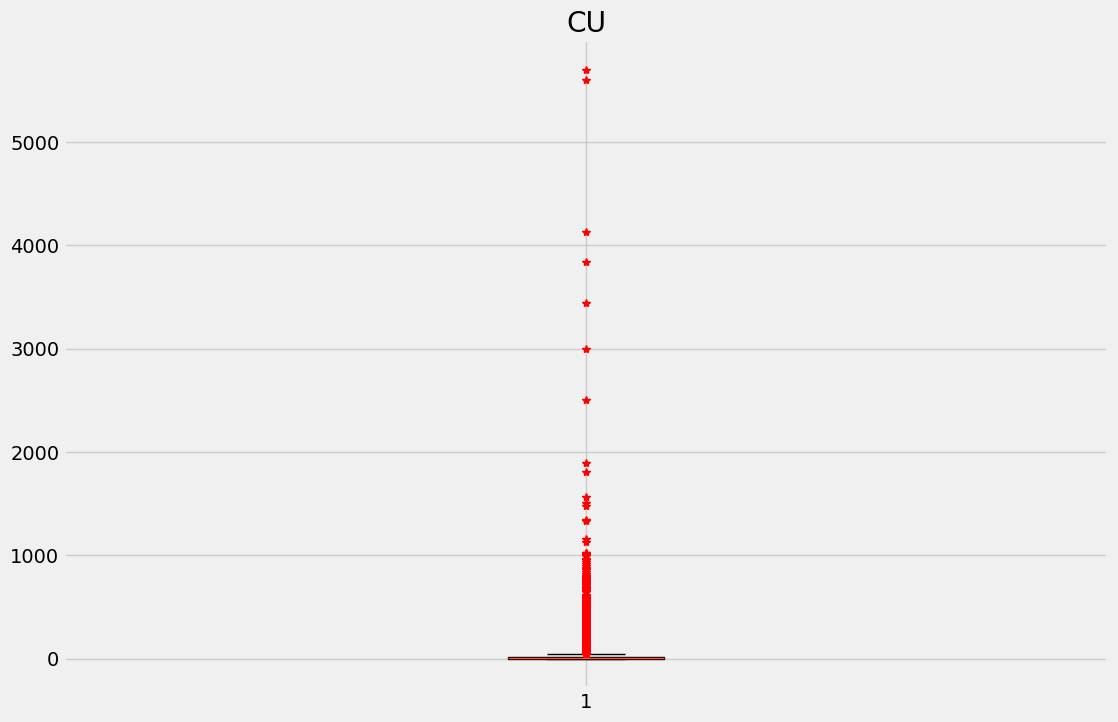

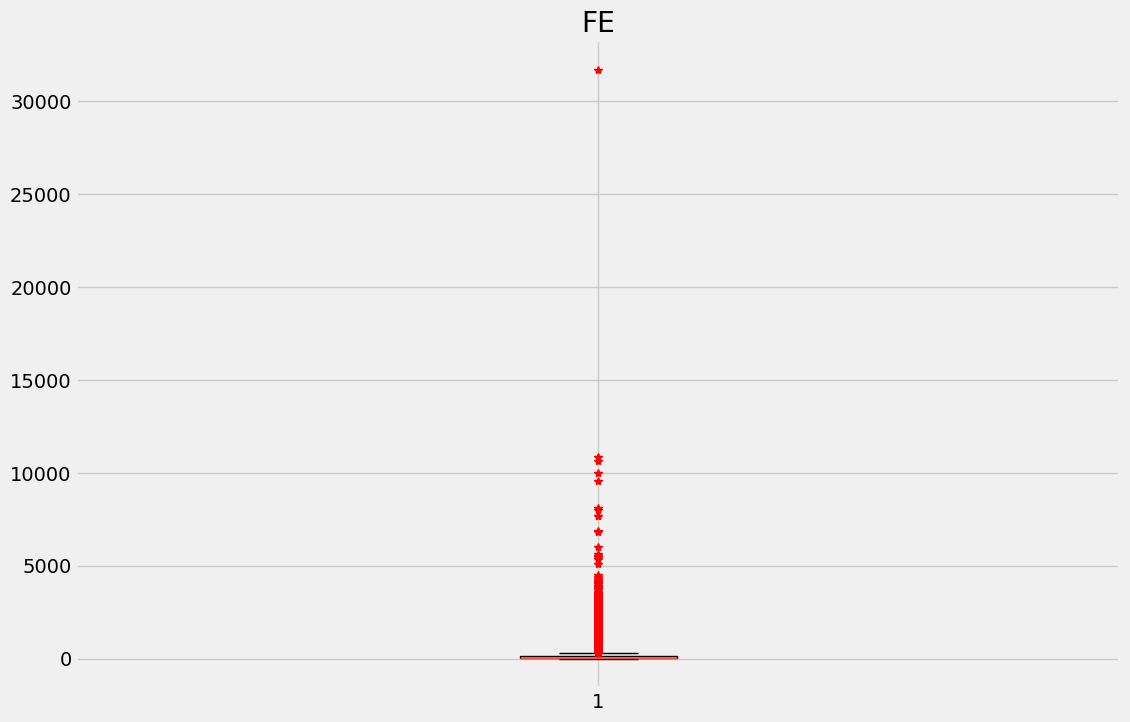

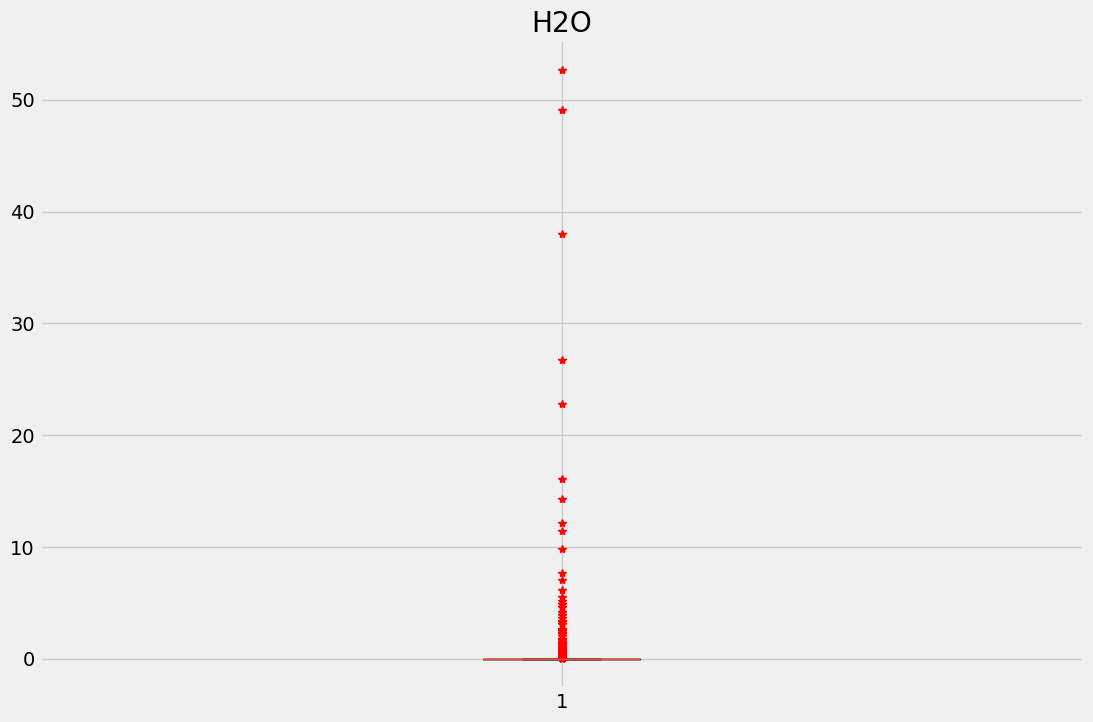

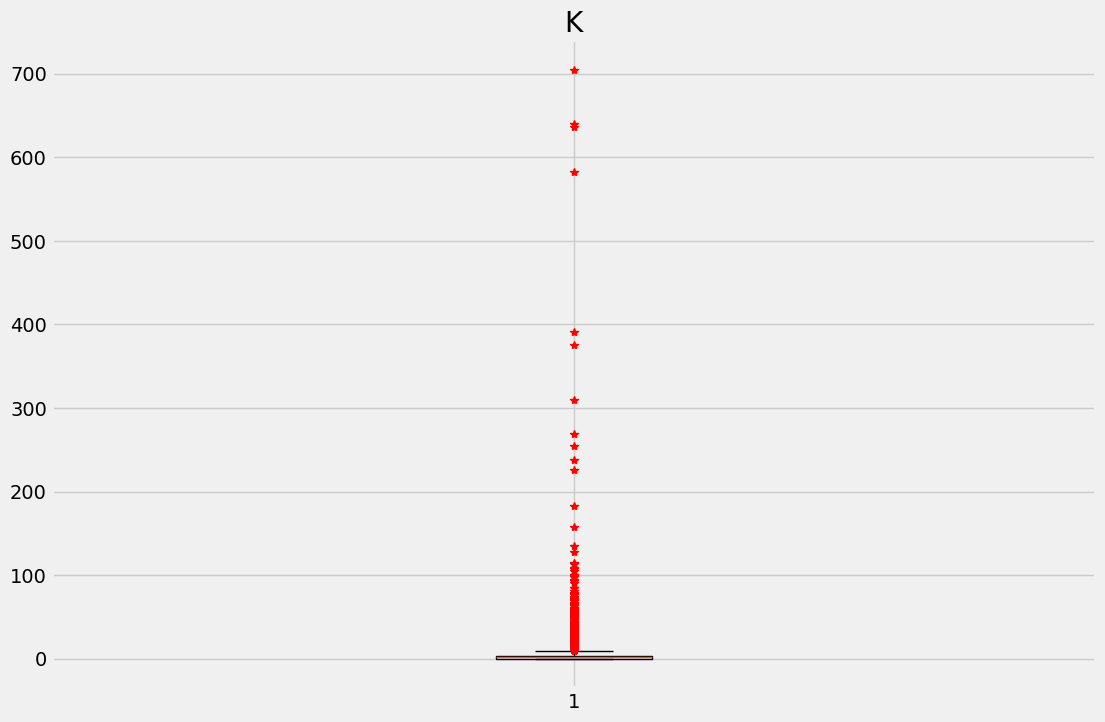

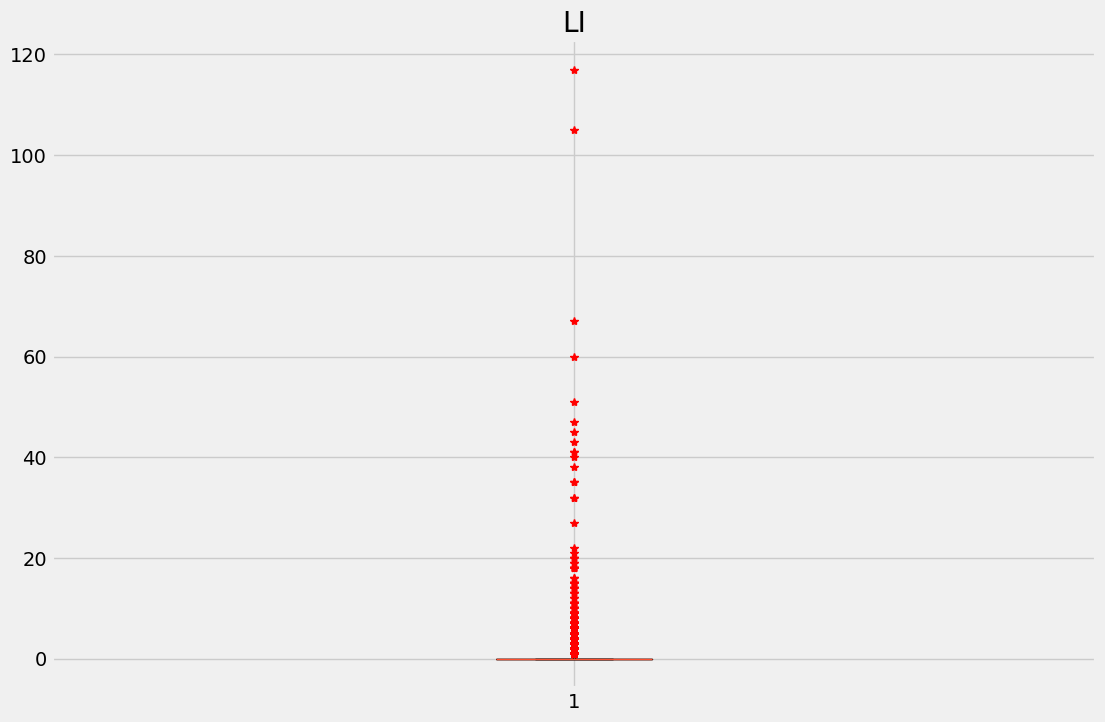

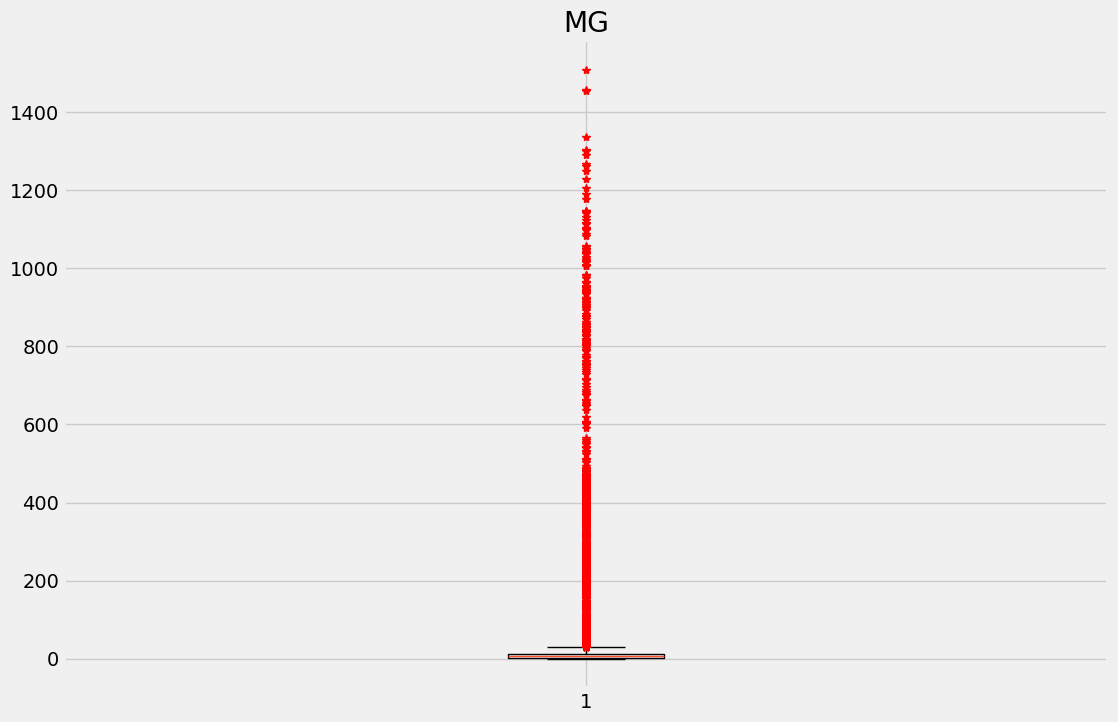

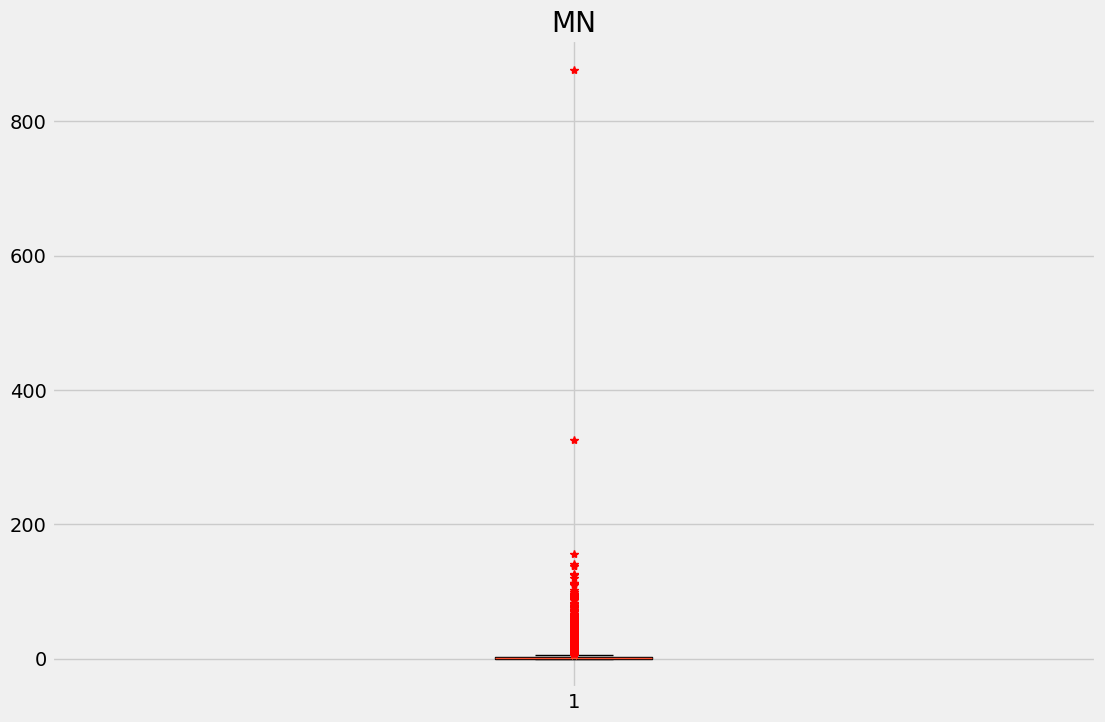

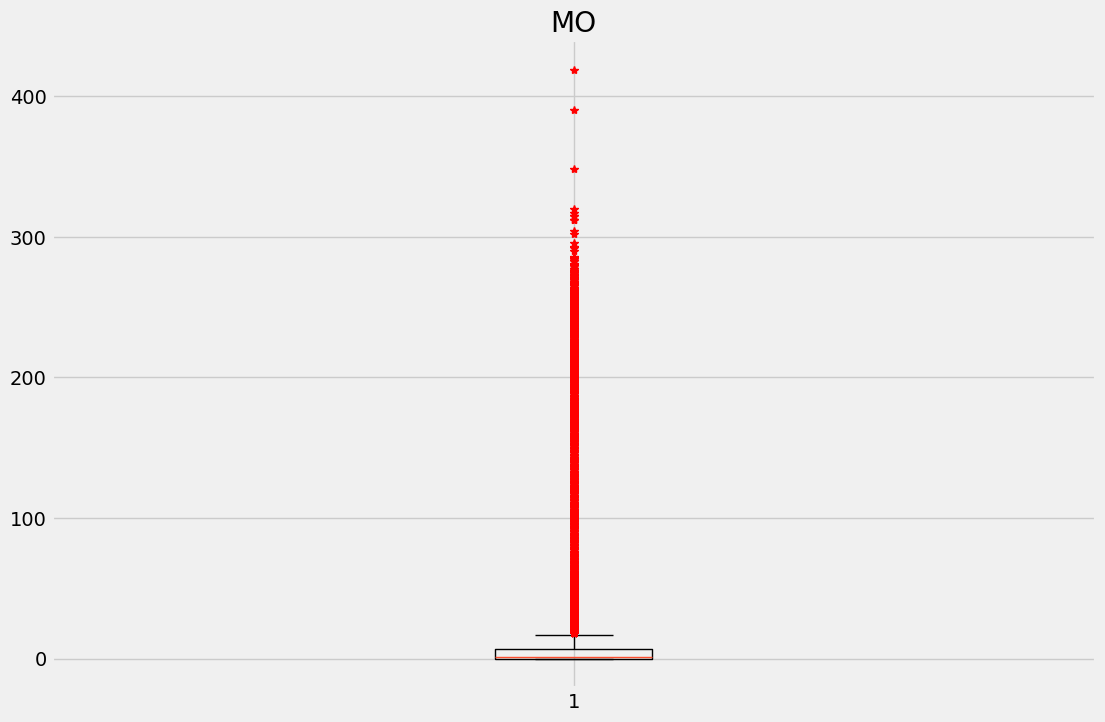

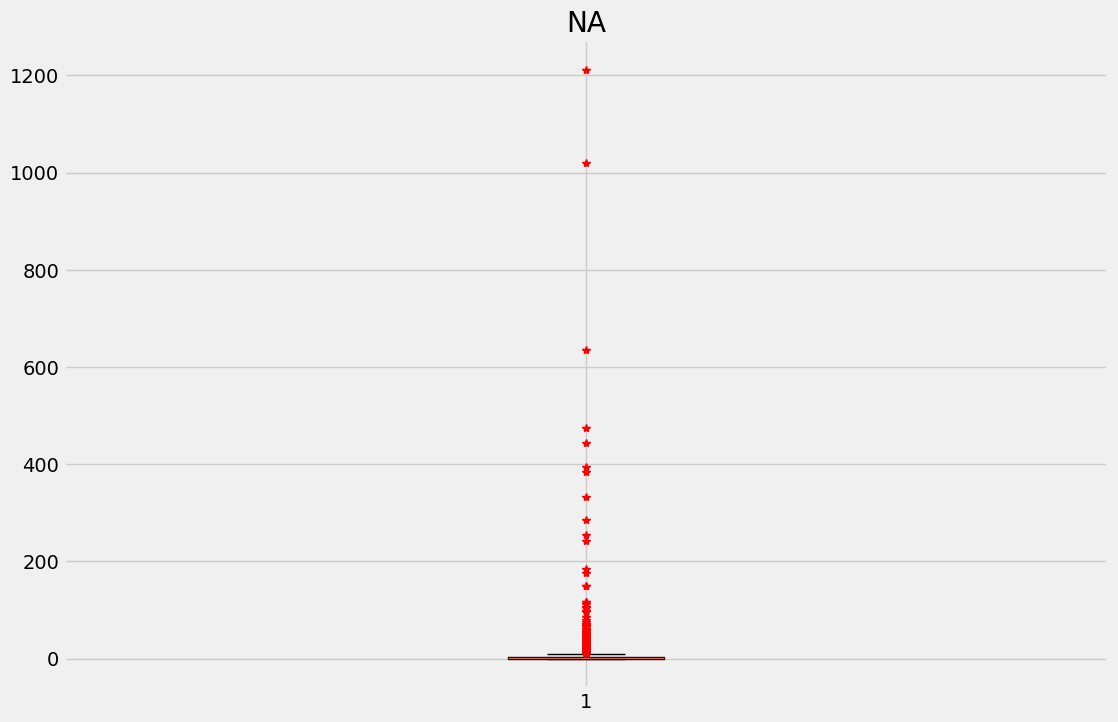

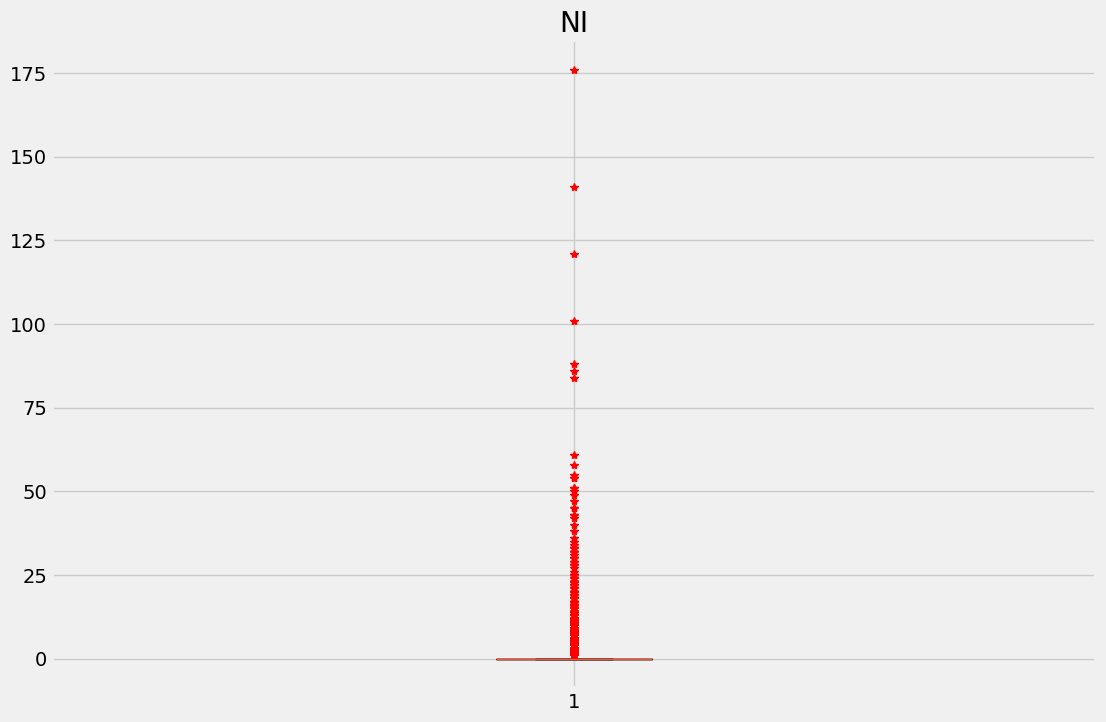

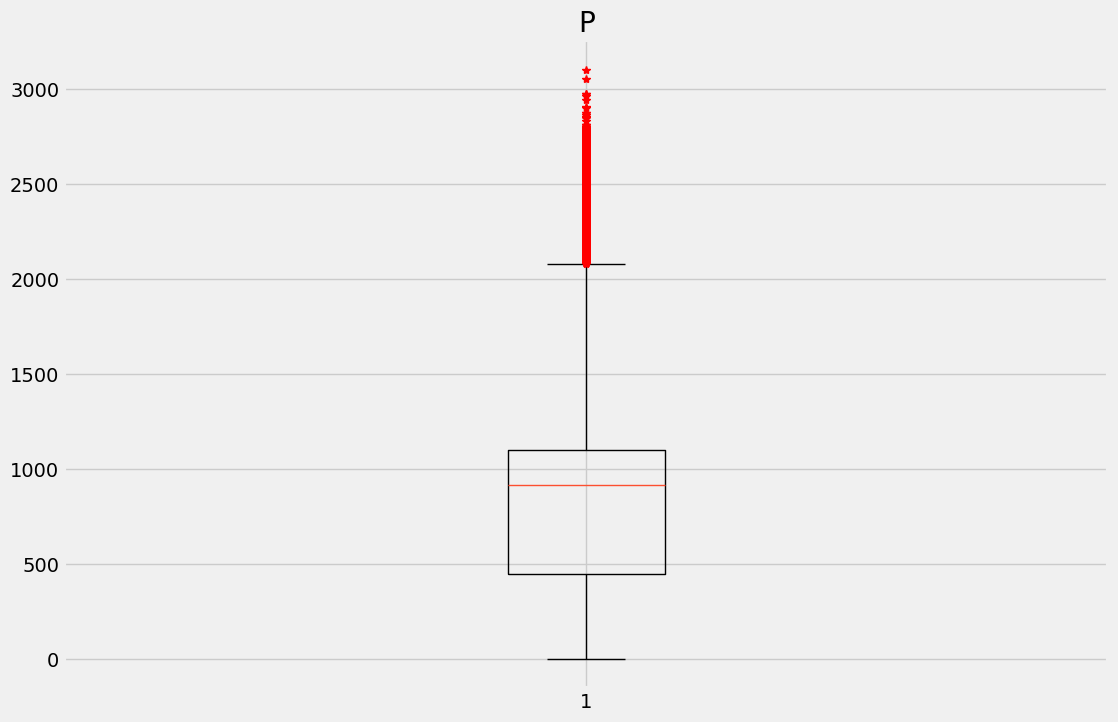

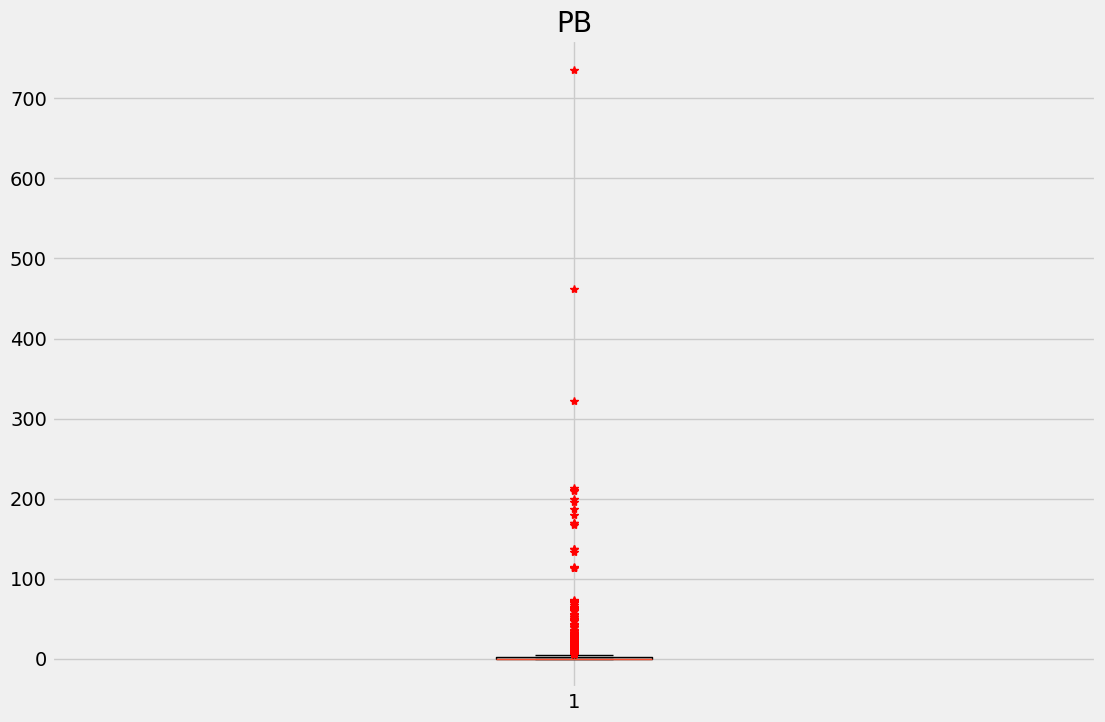

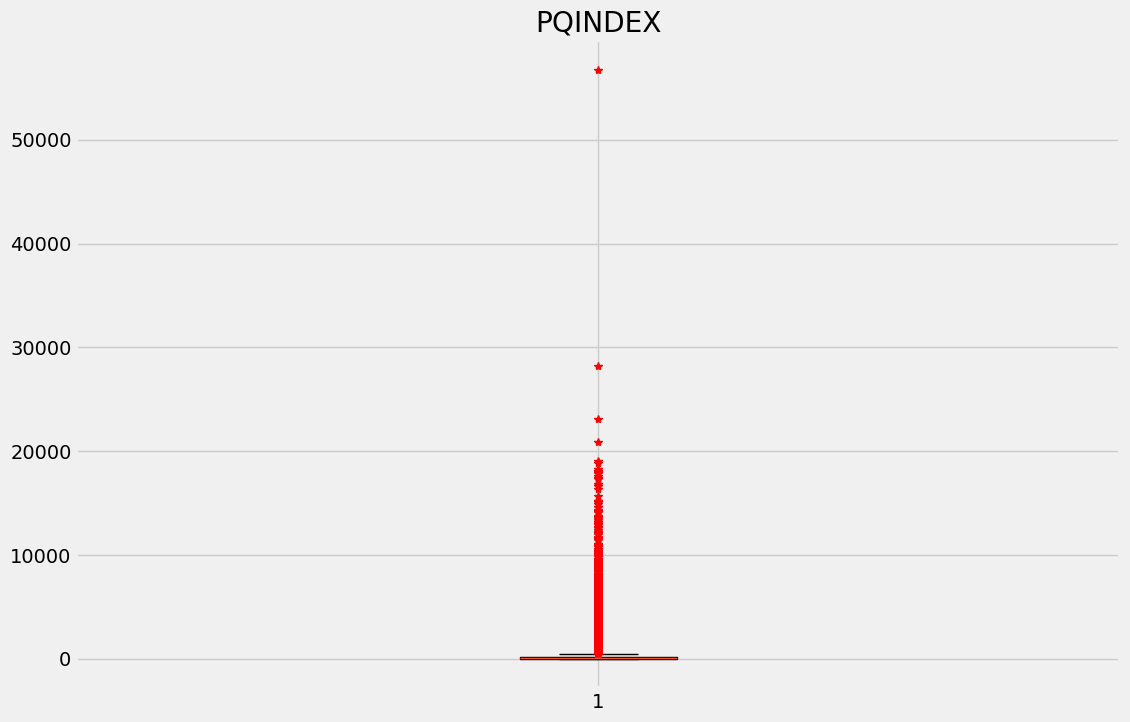

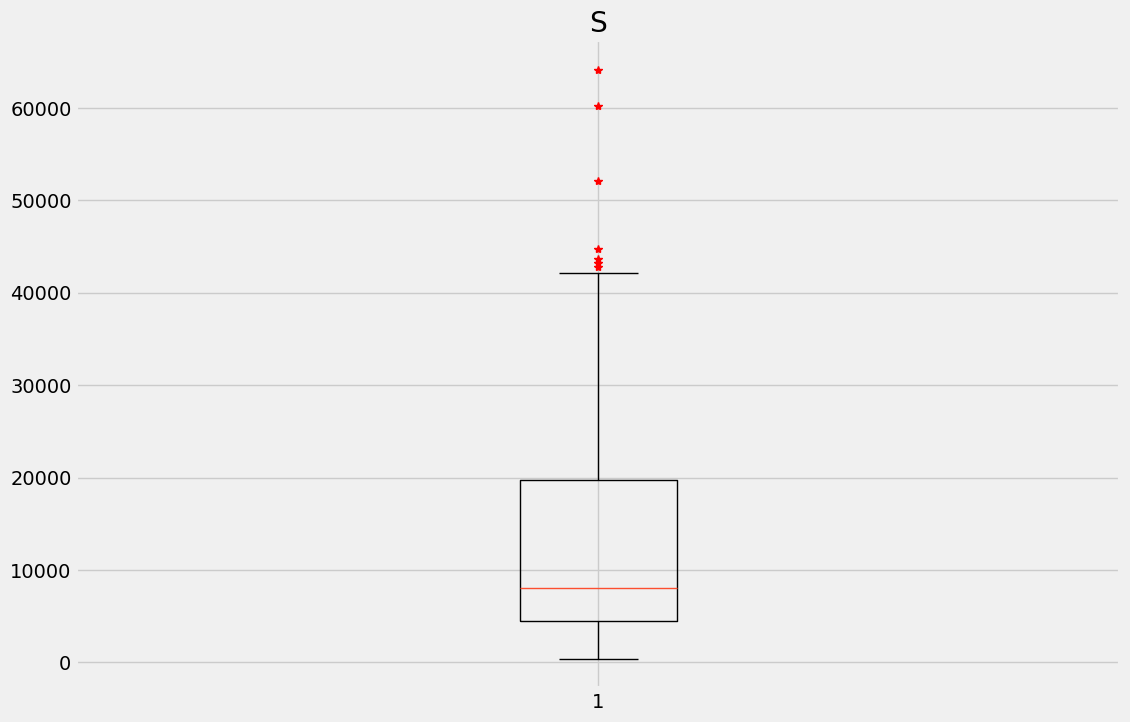

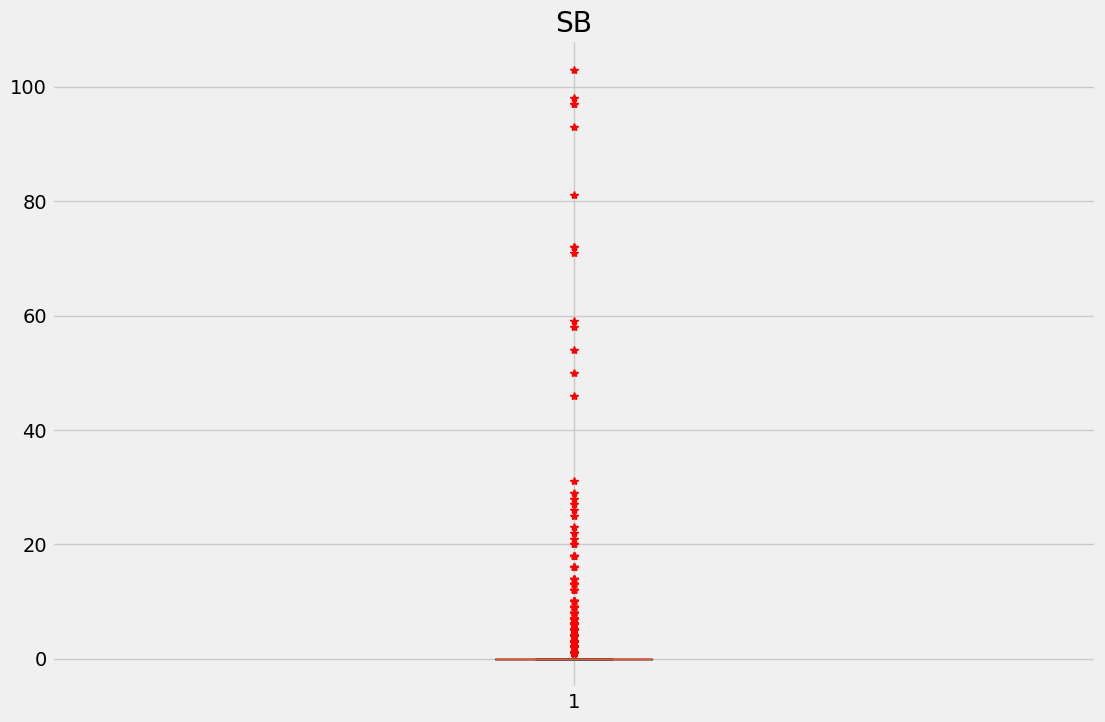

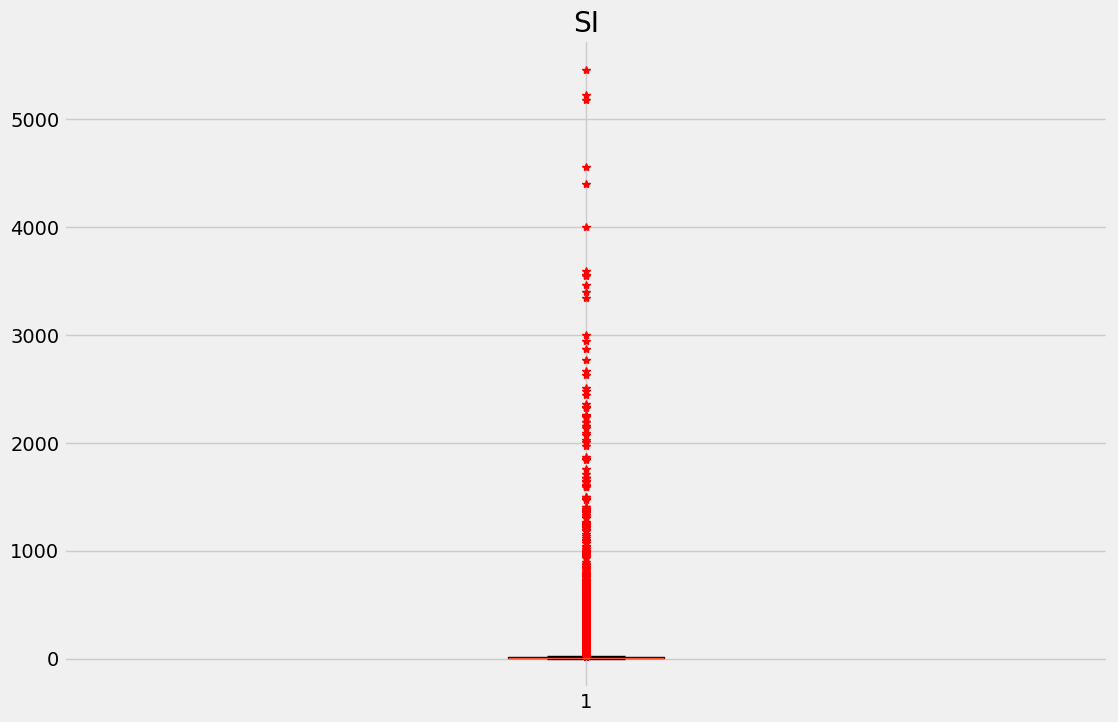

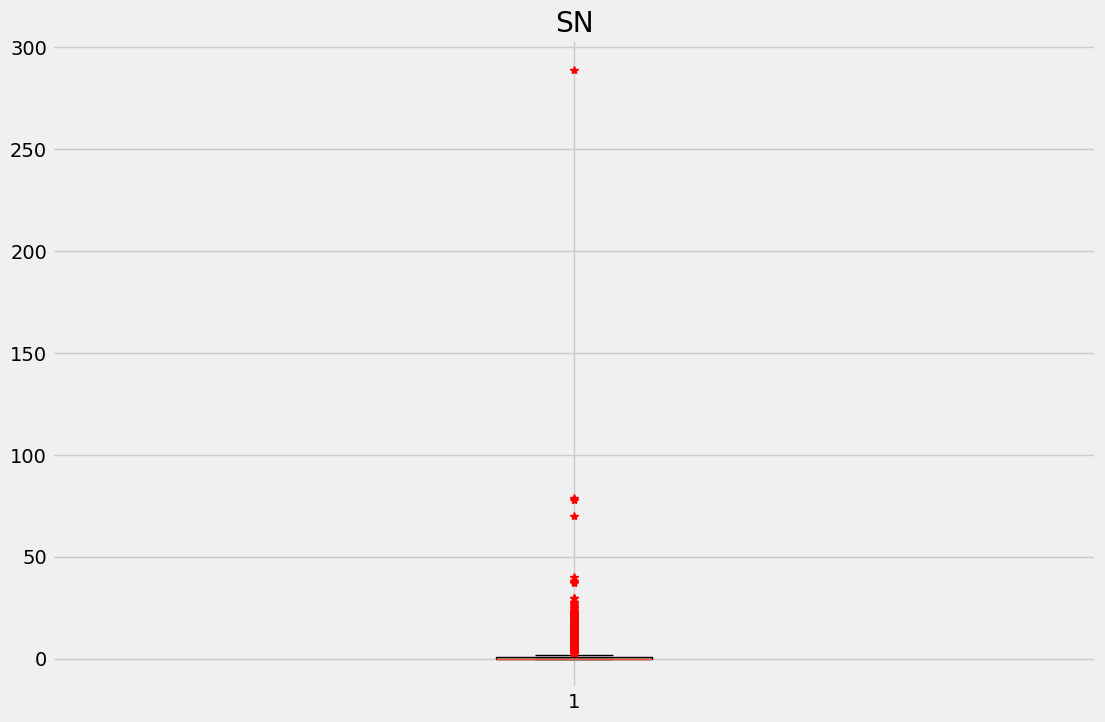

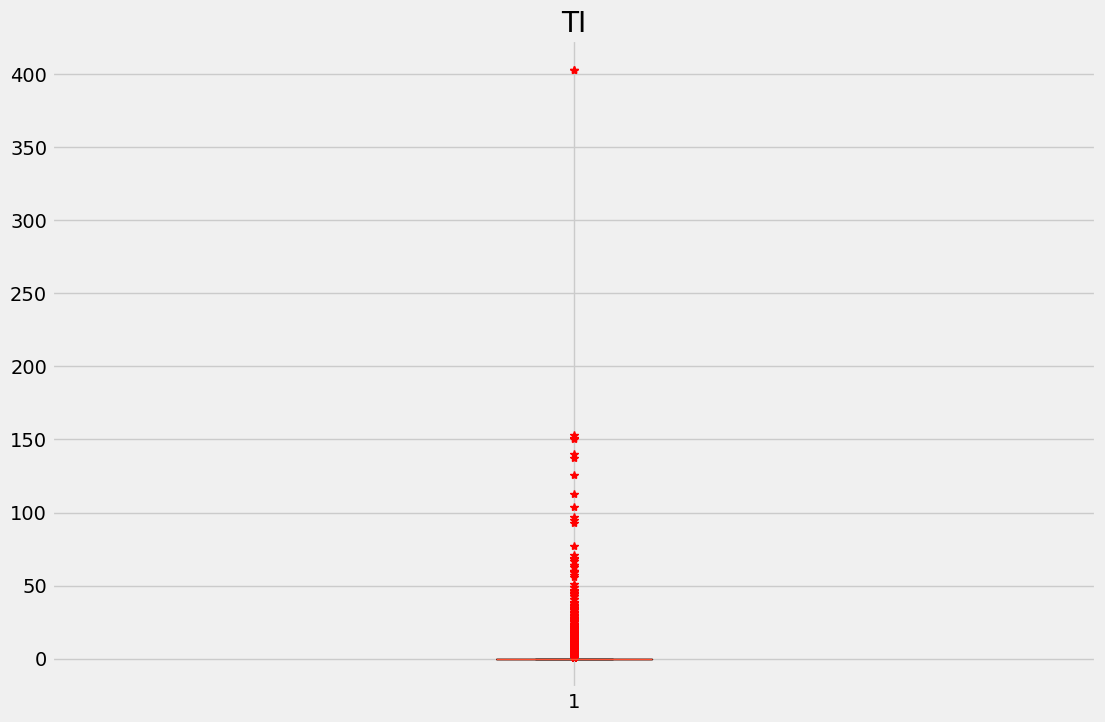

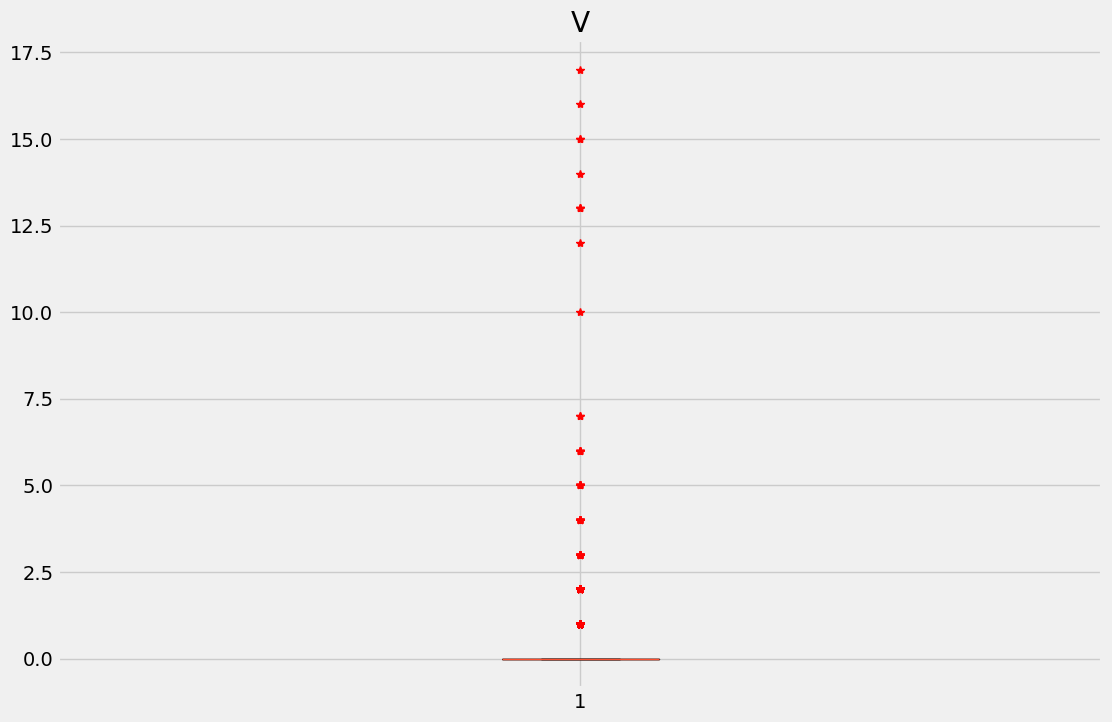

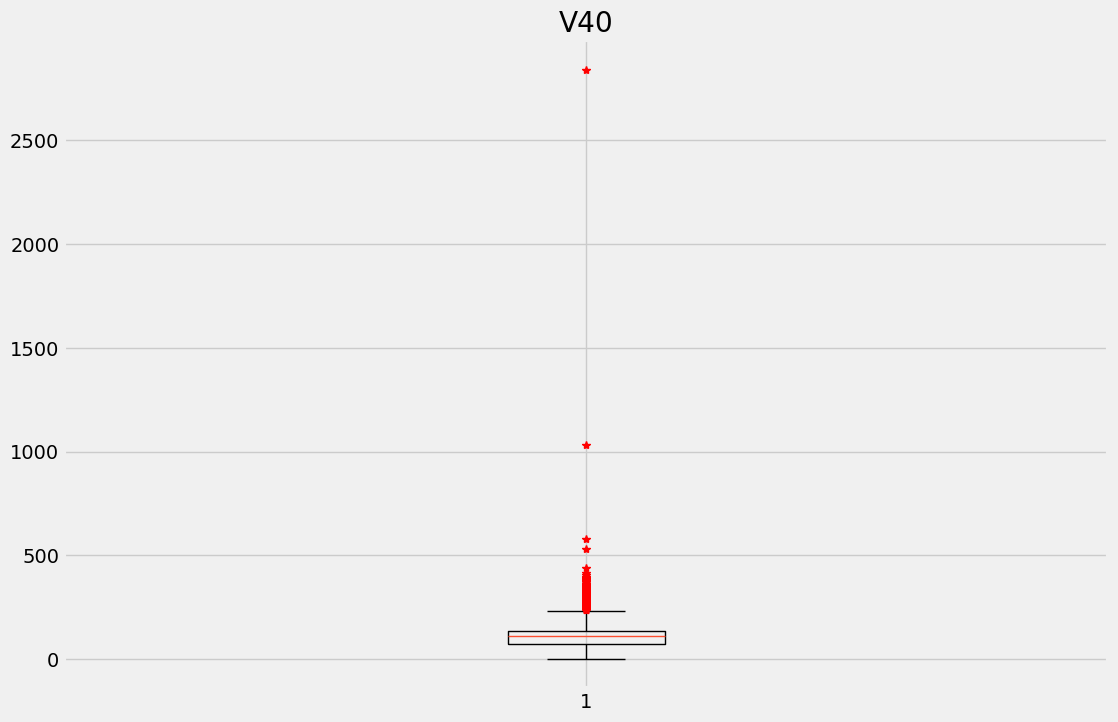

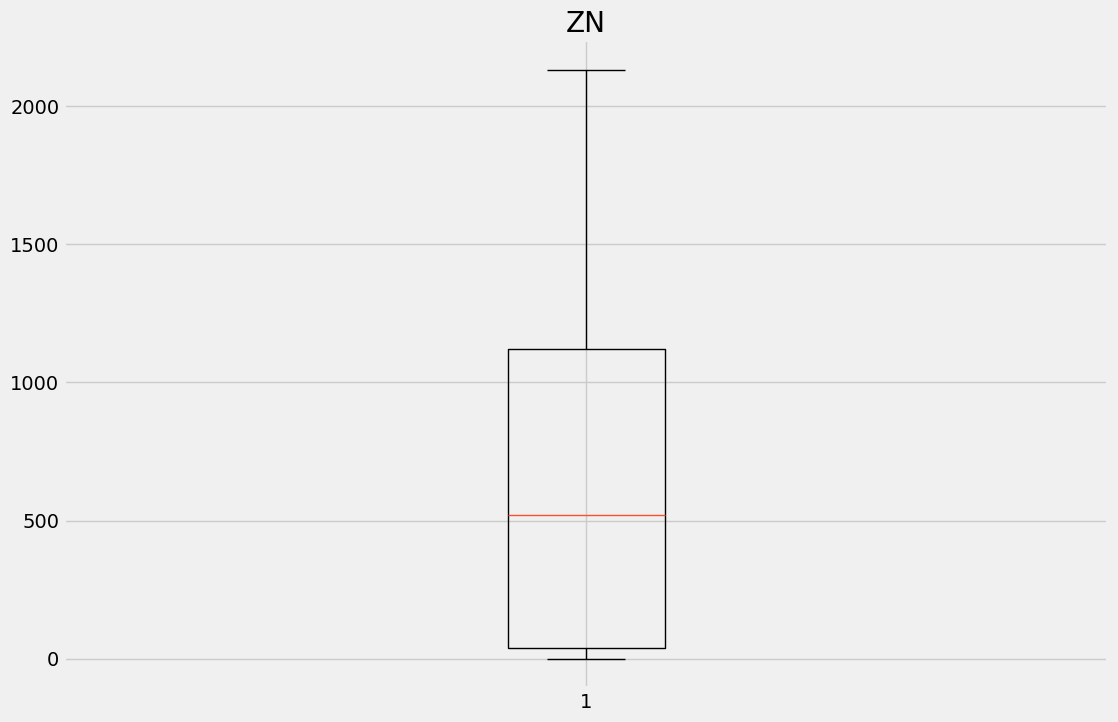

In [64]:
for col in numerical_features :
    plt.figure(figsize=(12, 8))
    plt.boxplot(df[col], sym='r*')
    plt.title(col)
    plt.show()

*    위의 boxplot을 참고하면 대부분의 데이터에서 Outlier 값이 매우 많은 것을 확인할 수 있다.
*    따라서 outlier 값을 제거하게 되면 데이터의 대부분이 소실되어 정확한 데이터 정보 파악이 불가능해 outlier 값을 포함해 데이터 시각화를 진행했다.

# 데이터 시각화

## Y_label 0과 1비율 확인

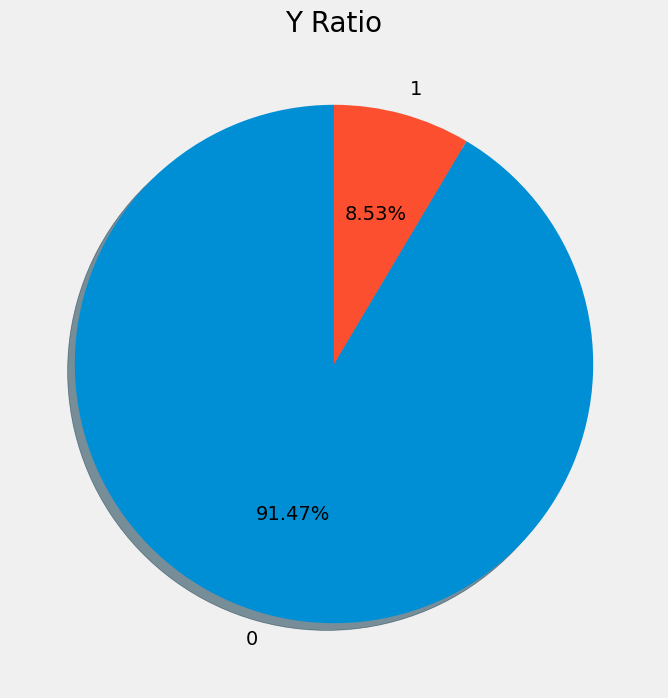

In [65]:
plt.subplots(figsize = (8,8))
plt.pie(df['Y_LABEL'].value_counts(), labels = df['Y_LABEL'].value_counts().index, 
        autopct="%.2f%%", shadow = True, startangle = 90)
plt.title('Y Ratio', size=20)
plt.show()

*   데이터의 개수가 다르기 때문에 이를 반영한 그래프 해석이 필요하다.

# ✅ **결론**

1. 정상치와 이상치의 비율이 지나치게 Imbalance하다.
2. 'AL'과 같이 test에는 존재하지 않는 feature들의 영향이 크므로 Teacher모델 훈련시에 이러한 feature들을 얼마나 잘 활용하느냐가 관건인 것 같다.
3. 주어진 데이터 자체가 많이 치우쳐 있으므로 Tree기반의 Ensemble 모델 혹은 딥러닝 모델의 성능이 좋을 것으로 판단되고 이러한 모델들을 활용할 때에 전처리 유무는 categorical 변수 외에는 크게 성능의 차이가 없는 것으로 보인다.
4. train에 과적합된 모델을 얼마나 test셋에 대하여 일반화를 잘 수행하는지가 Score 상승의 열쇠이다.

# train과 test dataset나누기

### ADASYN 사용

In [66]:
from imblearn.over_sampling import ADASYN

# 특성과 레이블 분리
X = df.drop('Y_LABEL', axis=1)
y = df['Y_LABEL'].astype('int')

# X는 입력 특성, y는 라벨로 이루어진 데이터셋
X_resampled, y_resampled = ADASYN().fit_resample(X, y)

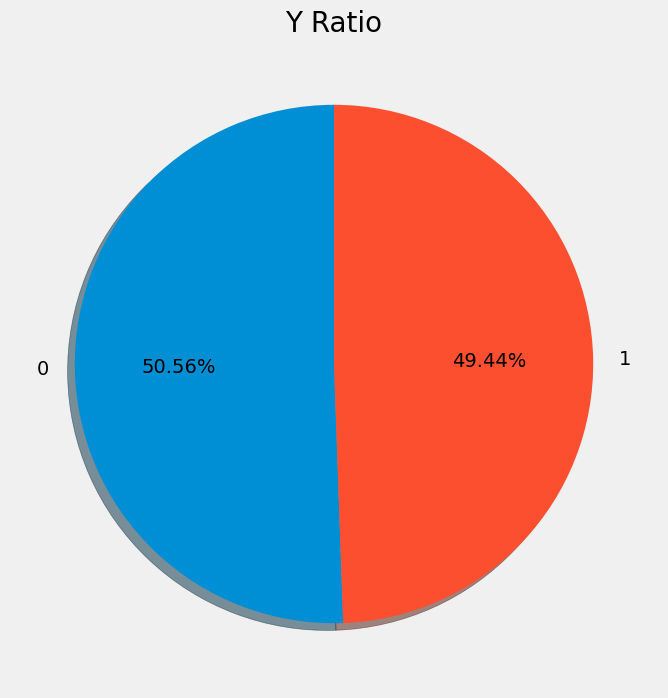

In [69]:
plt.subplots(figsize = (8,8))
plt.pie(y_resampled.value_counts(), labels = y_resampled.value_counts().index, 
        autopct="%.2f%%", shadow = True, startangle = 90)
plt.title('Y Ratio', size=20)
plt.show()

In [67]:
X, y = X_resampled, y_resampled
# 데이터를 트레인 데이터와 테스트 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결과 확인
print('X_train:\n',X_train)
print('X_test:\n',X_test)
print('y_train:\n',y_train)
print('y_test:\n',y_test)

X_train:
        COMPONENT1  COMPONENT2  COMPONENT3  COMPONENT4  ANONYMOUS_1  YEAR  \
15878           0           1           0           0         6698  2012   
15031           0           0           1           0         4858  2014   
21682           1           0           0           0         5543  2015   
13225           0           0           1           0         1186  2008   
3295            0           0           0           1         1697  2011   
...           ...         ...         ...         ...          ...   ...   
21575           0           0           1           0         6975  2009   
5390            0           1           0           0         2202  2007   
860             0           0           1           0        22087  2013   
15795           1           0           0           0         3012  2013   
23654           0           0           1           0         6496  2015   

       SAMPLE_TRANSFER_DAY  ANONYMOUS_2  AG   AL  ...   PB  PQINDEX      S  \

# 표준화

In [70]:
scaler = StandardScaler()

# 트레인 데이터에 대해 표준화를 적용하고, 테스트 데이터에 대해 표준화를 적용
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 결과 확인
print(X_train_std)
print(X_test_std)
print(y_train)
print(y_test)

[[-0.57106623  2.37798494 -0.95930175 ... -0.09197393 -1.39052929
   0.12661034]
 [-0.57106623 -0.42052411  1.04242487 ... -0.09197393  1.04455776
  -1.039124  ]
 [ 1.75111038 -0.42052411 -0.95930175 ... -0.09197393 -0.04281218
   1.1075796 ]
 ...
 [-0.57106623 -0.42052411  1.04242487 ... -0.09197393  0.60341219
  -0.99150414]
 [ 1.75111038 -0.42052411 -0.95930175 ... -0.09197393 -0.07074732
   0.53614119]
 [-0.57106623 -0.42052411  1.04242487 ...  6.09261571  0.66569773
  -1.039124  ]]
[[-0.57106623 -0.42052411  1.04242487 ... -0.09197393  0.54988967
  -1.03721921]
 [-0.57106623  2.37798494 -0.95930175 ... -0.09197393 -1.3897666
   0.13041993]
 [-0.57106623 -0.42052411  1.04242487 ... -0.09197393  1.65518003
  -1.04483839]
 ...
 [-0.57106623 -0.42052411  1.04242487 ... -0.09197393  0.50026457
  -0.93816988]
 [-0.57106623  2.37798494 -0.95930175 ... -0.09197393 -1.36767501
  -0.16291845]
 [ 1.75111038 -0.42052411 -0.95930175 ... -0.09197393  0.10458227
   1.6447317 ]]
15878    1
15031 

# KNN
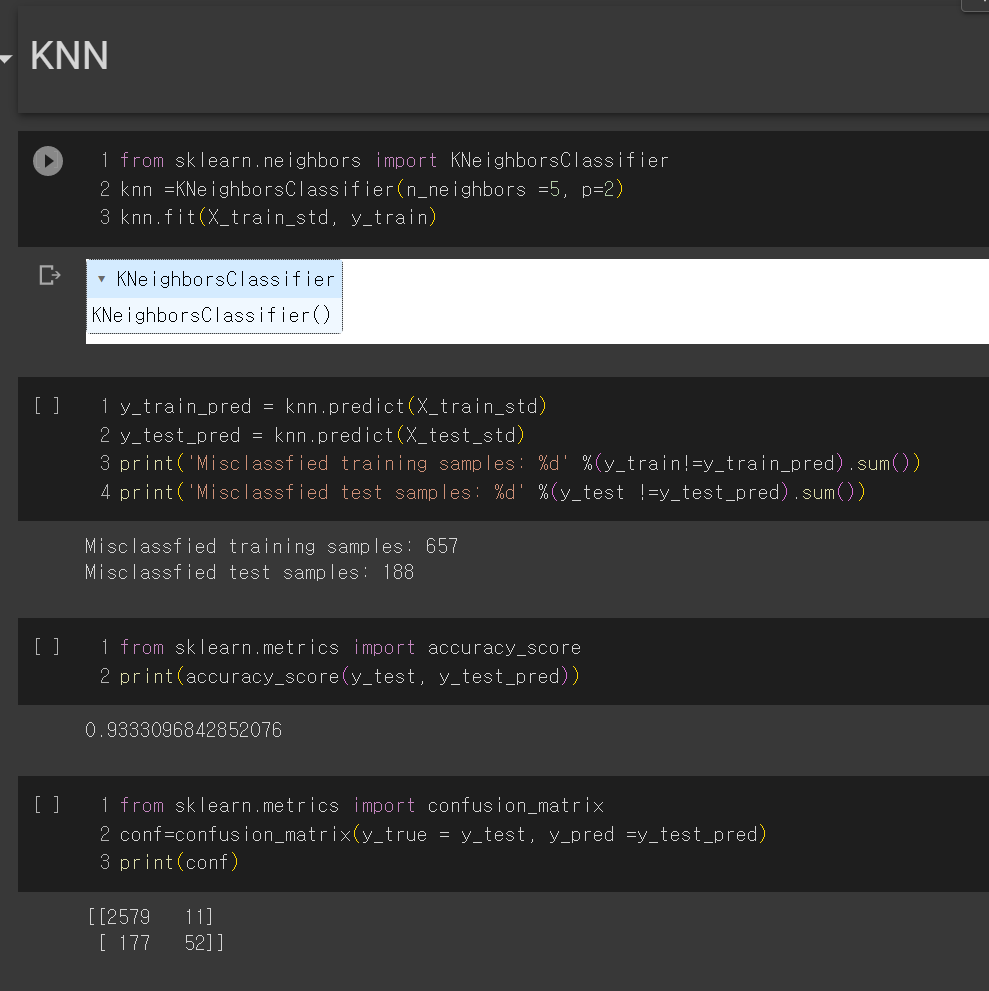

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors =5, p=2)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [72]:
y_train_pred = knn.predict(X_train_std)
y_test_pred = knn.predict(X_test_std)
print('Misclassfied training samples: %d' %(y_train!=y_train_pred).sum())
print('Misclassfied test samples: %d' %(y_test !=y_test_pred).sum())

Misclassfied training samples: 1316
Misclassfied test samples: 493


In [74]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred))

0.9033333333333333


In [75]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_true = y_test, y_pred =y_test_pred)
print(conf)

[[2199  402]
 [  91 2408]]


# Logistic regression classifier
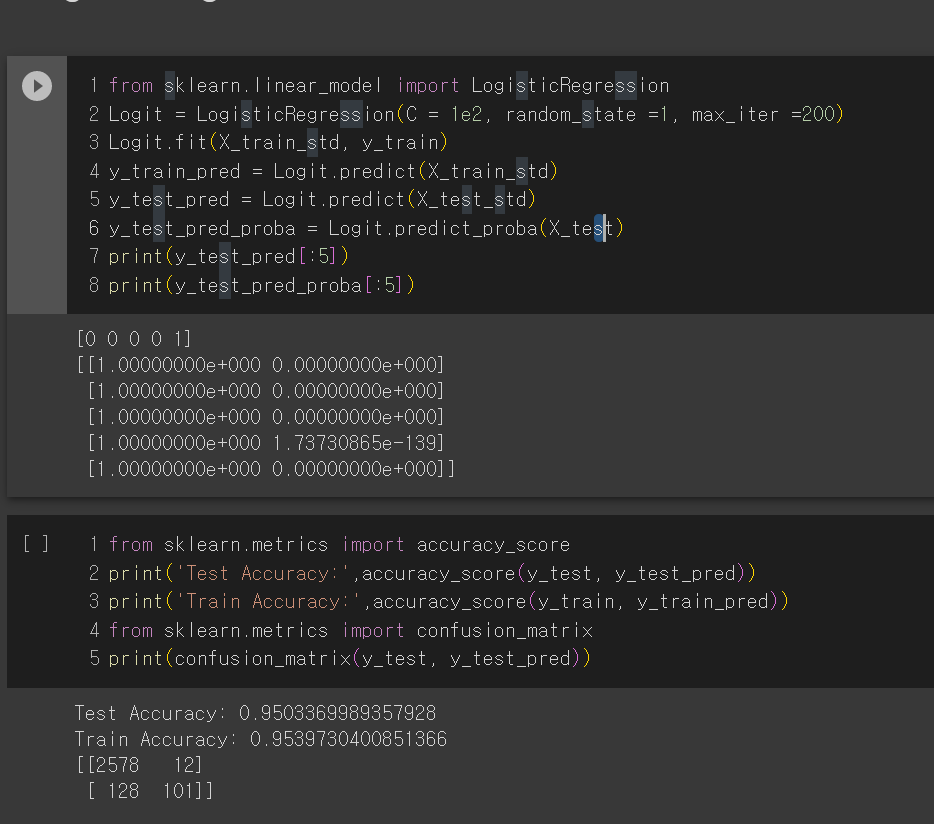

In [76]:
from sklearn.linear_model import LogisticRegression
Logit = LogisticRegression(C = 1e2, random_state =1, max_iter =200)
Logit.fit(X_train_std, y_train)
y_train_pred = Logit.predict(X_train_std)
y_test_pred = Logit.predict(X_test_std)
y_test_pred_proba = Logit.predict_proba(X_test)
print(y_test_pred[:5])
print(y_test_pred_proba[:5])

[0 0 0 0 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [77]:
from sklearn.metrics import accuracy_score
print('Test Accuracy:',accuracy_score(y_test, y_test_pred))
print('Train Accuracy:',accuracy_score(y_train, y_train_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.8727450980392157
Train Accuracy: 0.8676766191106535
[[2463  138]
 [ 511 1988]]


### L1, L2 Regularization
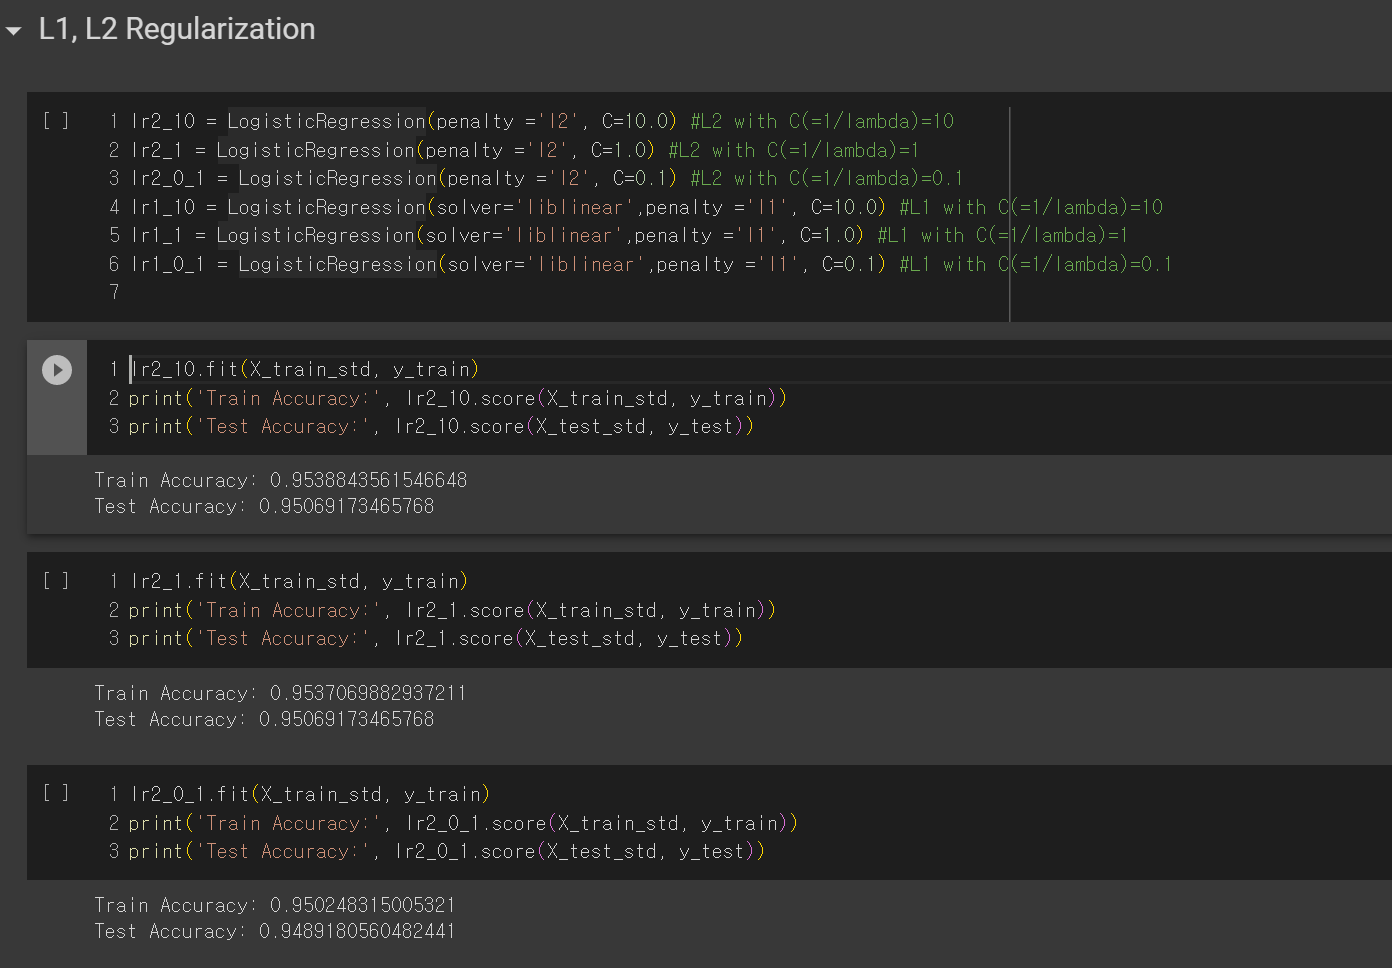
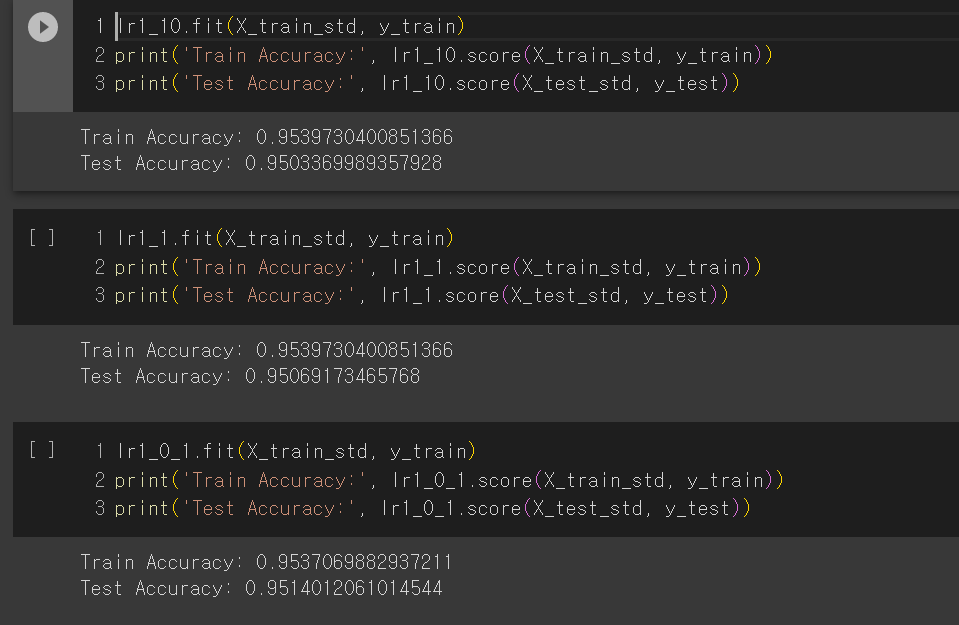

In [78]:
lr2_10 = LogisticRegression(penalty ='l2', C=10.0) #L2 with C(=1/lambda)=10
lr2_1 = LogisticRegression(penalty ='l2', C=1.0) #L2 with C(=1/lambda)=1
lr2_0_1 = LogisticRegression(penalty ='l2', C=0.1) #L2 with C(=1/lambda)=0.1
lr1_10 = LogisticRegression(solver='liblinear',penalty ='l1', C=10.0) #L1 with C(=1/lambda)=10
lr1_1 = LogisticRegression(solver='liblinear',penalty ='l1', C=1.0) #L1 with C(=1/lambda)=1
lr1_0_1 = LogisticRegression(solver='liblinear',penalty ='l1', C=0.1) #L1 with C(=1/lambda)=0.1


In [79]:
lr2_10.fit(X_train_std, y_train)
print('Train Accuracy:', lr2_10.score(X_train_std, y_train))
print('Test Accuracy:', lr2_10.score(X_test_std, y_test))

Train Accuracy: 0.8674314850223072
Test Accuracy: 0.8725490196078431


In [80]:
lr2_1.fit(X_train_std, y_train)
print('Train Accuracy:', lr2_1.score(X_train_std, y_train))
print('Test Accuracy:', lr2_1.score(X_test_std, y_test))

Train Accuracy: 0.8665980291219297
Test Accuracy: 0.87


In [81]:
lr2_0_1.fit(X_train_std, y_train)
print('Train Accuracy:', lr2_0_1.score(X_train_std, y_train))
print('Test Accuracy:', lr2_0_1.score(X_test_std, y_test))

Train Accuracy: 0.8617934009903417
Test Accuracy: 0.8664705882352941


In [82]:
print(lr2_10.intercept_)
print(lr2_1.intercept_)
print(lr2_0_1.intercept_)

[6.94039779]
[5.37105495]
[2.50256921]


In [83]:
print(lr2_10.coef_)
print(lr2_1.coef_)
print(lr2_0_1.coef_)

[[-3.75719400e+00 -3.09776502e+00 -4.29881721e+00 -1.75271899e+00
   2.49460422e-01 -7.10499828e-01  4.28964202e-02 -1.18608142e-01
  -2.15856853e-01  2.17653215e+01 -7.47924006e-02 -1.45561026e-02
  -3.34525419e-03 -3.77185095e-01  3.64867959e-02 -3.67007660e-01
   1.11413909e-01  7.42967223e-02  3.20233151e-01 -3.68840861e-02
   1.14839751e-01 -9.88615642e-02 -1.43303791e-02  1.54758232e-02
  -3.42066369e-02 -6.32040229e-01 -3.97774828e-01  1.21585279e-01
   6.04243841e-03  2.91315443e-02 -4.17249018e-03 -8.45800865e-01
  -2.61725859e-01 -1.64436984e-01 -2.25735789e-01 -2.38359192e-01
   1.02664078e-01  8.65524735e-02]]
[[-2.83267617e+00 -2.32928239e+00 -3.23699068e+00 -1.35608098e+00
   2.50912099e-01 -6.99220372e-01  4.09854940e-02 -1.17855827e-01
  -2.01601346e-01  1.76570427e+01 -6.41881035e-02 -9.55934657e-03
   1.02199914e-03 -3.40618568e-01  3.45002187e-02 -3.70311469e-01
   9.93617742e-02  7.47257061e-02  3.09074389e-01 -3.25304121e-02
   1.19647239e-01 -1.00747962e-01 -1.407

In [84]:
lr1_10.fit(X_train_std, y_train)
print('Train Accuracy:', lr1_10.score(X_train_std, y_train))
print('Test Accuracy:', lr1_10.score(X_test_std, y_test))

KeyboardInterrupt: ignored

In [85]:
lr1_1.fit(X_train_std, y_train)
print('Train Accuracy:', lr1_1.score(X_train_std, y_train))
print('Test Accuracy:', lr1_1.score(X_test_std, y_test))

Train Accuracy: 0.866647055939599
Test Accuracy: 0.8705882352941177


In [86]:
lr1_0_1.fit(X_train_std, y_train)
print('Train Accuracy:', lr1_0_1.score(X_train_std, y_train))
print('Test Accuracy:', lr1_0_1.score(X_test_std, y_test))

Train Accuracy: 0.8668921900279453
Test Accuracy: 0.8713725490196078


In [88]:
# print(lr1_10.intercept_)
print(lr1_1.intercept_)
print(lr1_0_1.intercept_)

[5.46017494]
[5.47951124]


In [89]:
# print(lr1_10.coef_)
print(lr1_1.coef_)
print(lr1_0_1.coef_)

[[-2.30386421e+00 -1.89426284e+00 -2.61756226e+00 -1.12570279e+00
   2.50697179e-01 -7.01273358e-01  4.09156269e-02 -1.16583290e-01
  -2.03659141e-01  1.82918728e+01 -6.63768261e-02 -9.24675897e-03
   3.70545860e-04 -3.40862947e-01  3.42467895e-02 -3.66731804e-01
   1.00485821e-01  7.38223450e-02  3.08882431e-01 -2.98392309e-02
   1.15719000e-01 -9.99876467e-02 -1.24376982e-02  0.00000000e+00
  -3.04968125e-02 -5.89097251e-01 -3.60059805e-01  1.20639774e-01
   9.27011122e-03  3.39208939e-02  2.03925391e-04 -8.18437606e-01
  -2.72908045e-01 -1.61449716e-01 -1.72627003e-01 -2.13036722e-01
   9.04340503e-02  8.20070084e-02]]
[[-2.20766850e+00 -1.82427751e+00 -2.50632205e+00 -1.08541702e+00
   2.42652574e-01 -6.91028768e-01  3.67483559e-02 -1.09105245e-01
  -1.96927489e-01  1.82888549e+01 -6.34711796e-02 -3.94431483e-03
   0.00000000e+00 -3.38683786e-01  3.05949328e-02 -3.23070042e-01
   8.15977513e-02  5.28351539e-02  2.71374285e-01 -1.87181064e-02
   9.04632492e-02 -8.57839783e-02 -5.746

# LDA
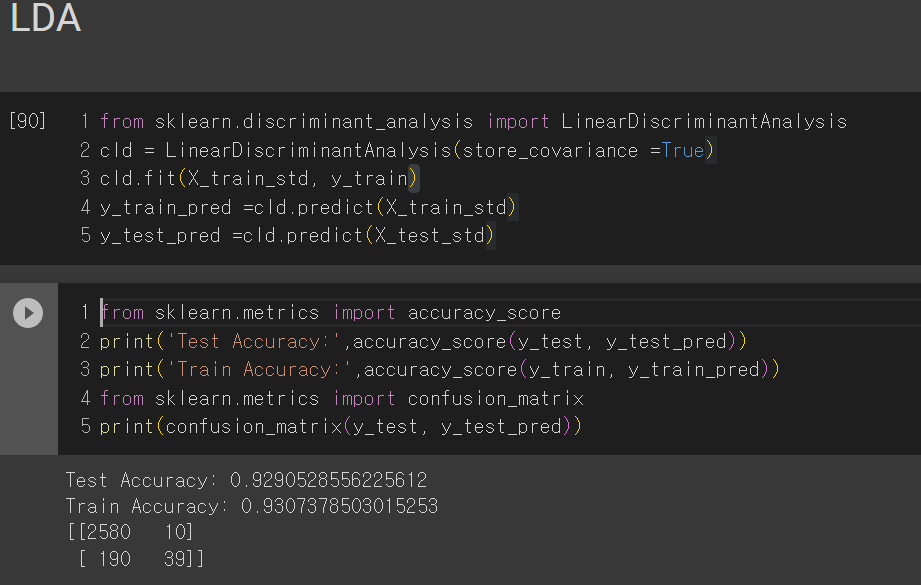


In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cld = LinearDiscriminantAnalysis(store_covariance =True)
cld.fit(X_train_std, y_train)
y_train_pred =cld.predict(X_train_std)
y_test_pred =cld.predict(X_test_std)

In [91]:
from sklearn.metrics import accuracy_score
print('Test Accuracy:',accuracy_score(y_test, y_test_pred))
print('Train Accuracy:',accuracy_score(y_train, y_train_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.7876470588235294
Train Accuracy: 0.7730548610089719
[[2119  482]
 [ 601 1898]]


# QDA
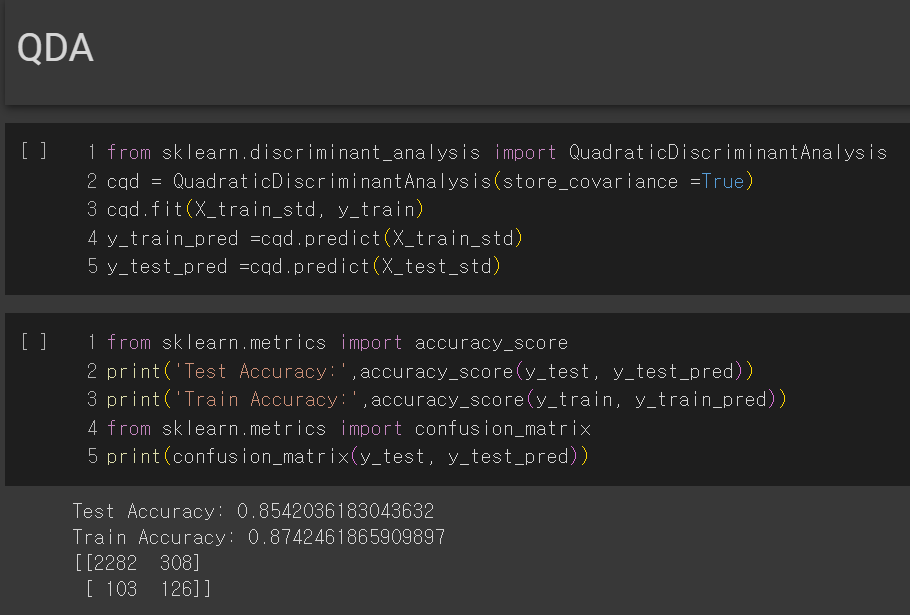


In [92]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
cqd = QuadraticDiscriminantAnalysis(store_covariance =True)
cqd.fit(X_train_std, y_train)
y_train_pred =cqd.predict(X_train_std)
y_test_pred =cqd.predict(X_test_std)

In [93]:
from sklearn.metrics import accuracy_score
print('Test Accuracy:',accuracy_score(y_test, y_test_pred))
print('Train Accuracy:',accuracy_score(y_train, y_train_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.8276470588235294
Train Accuracy: 0.8216894641368829
[[2570   31]
 [ 848 1651]]


# Naive Bayes
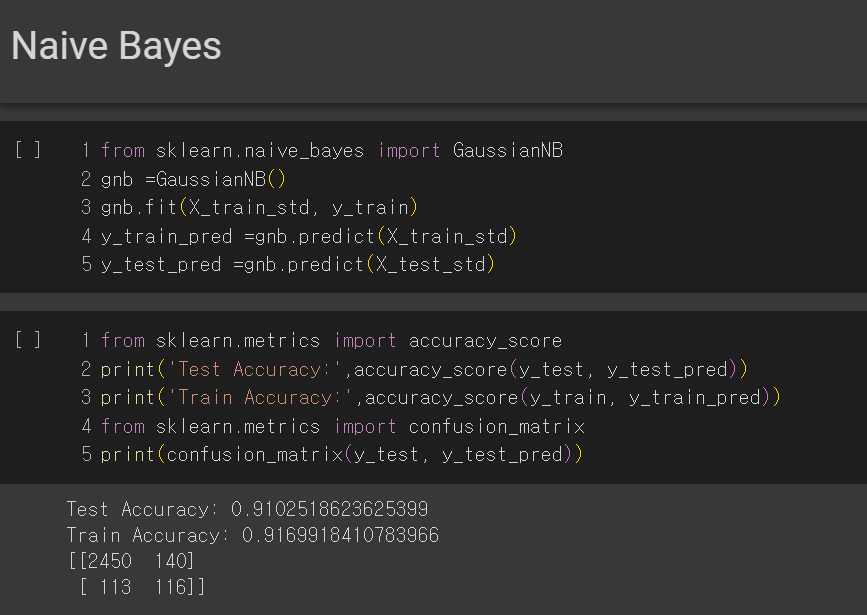

In [94]:
from sklearn.naive_bayes import GaussianNB
gnb =GaussianNB()
gnb.fit(X_train_std, y_train)
y_train_pred =gnb.predict(X_train_std)
y_test_pred =gnb.predict(X_test_std)

In [95]:
from sklearn.metrics import accuracy_score
print('Test Accuracy:',accuracy_score(y_test, y_test_pred))
print('Train Accuracy:',accuracy_score(y_train, y_train_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.5954901960784313
Train Accuracy: 0.5917536892680296
[[ 649 1952]
 [ 111 2388]]


# Classification Tree
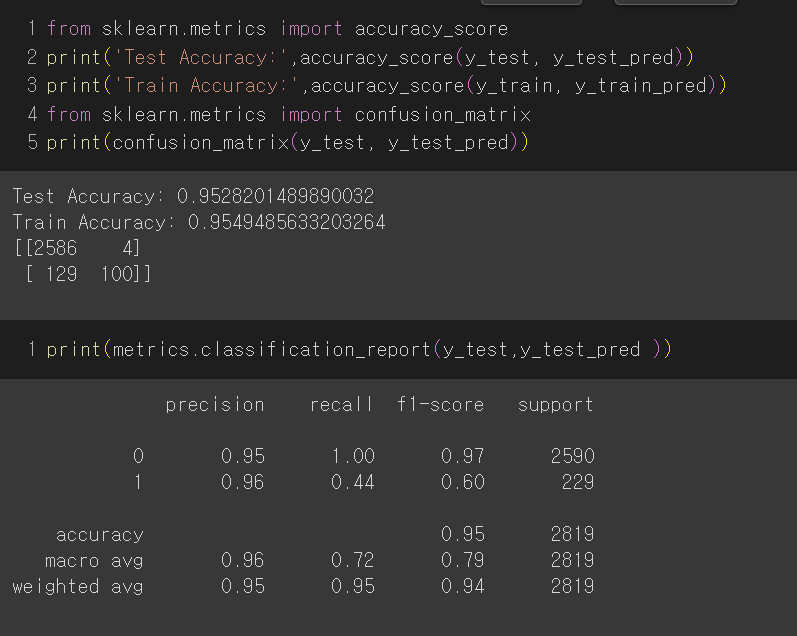


In [96]:
from sklearn import tree
dtc =tree.DecisionTreeClassifier(criterion ='gini', max_depth=3,random_state=1 )
result =dtc.fit(X_train_std, y_train)

y_train_pred =dtc.predict(X_train_std)
y_test_pred =dtc.predict(X_test_std)

[Text(0.5, 0.875, 'AL <= -0.29\ngini = 0.5\nsamples = 20397\nvalue = [10291, 10106]\nclass = 0'),
 Text(0.25, 0.625, 'YEAR <= 0.429\ngini = 0.377\nsamples = 13333\nvalue = [9976, 3357]\nclass = 0'),
 Text(0.125, 0.375, 'ANONYMOUS_1 <= 0.062\ngini = 0.44\nsamples = 8598\nvalue = [5785, 2813]\nclass = 0'),
 Text(0.0625, 0.125, 'gini = 0.394\nsamples = 6523\nvalue = [4764, 1759]\nclass = 0'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 2075\nvalue = [1021, 1054]\nclass = 1'),
 Text(0.375, 0.375, 'AL <= -0.358\ngini = 0.203\nsamples = 4735\nvalue = [4191, 544]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.126\nsamples = 3096\nvalue = [2887, 209]\nclass = 0'),
 Text(0.4375, 0.125, 'gini = 0.325\nsamples = 1639\nvalue = [1304, 335]\nclass = 0'),
 Text(0.75, 0.625, 'AL <= -0.223\ngini = 0.085\nsamples = 7064\nvalue = [315, 6749]\nclass = 1'),
 Text(0.625, 0.375, 'ANONYMOUS_1 <= -0.384\ngini = 0.386\nsamples = 953\nvalue = [249, 704]\nclass = 1'),
 Text(0.5625, 0.125, 'gini = 0.494\nsamples = 2

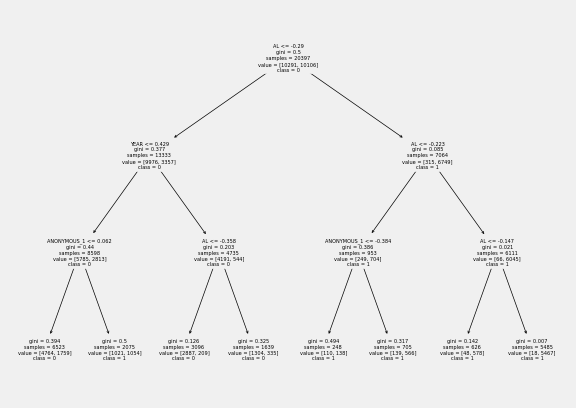

In [97]:
tree.plot_tree(result, class_names=['0','1'], feature_names=X_train.columns)

In [98]:
from sklearn.metrics import accuracy_score
print('Test Accuracy:',accuracy_score(y_test, y_test_pred))
print('Train Accuracy:',accuracy_score(y_train, y_train_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.8237254901960784
Train Accuracy: 0.8215914105015444
[[2258  343]
 [ 556 1943]]


In [101]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_test_pred ))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      2601
           1       0.85      0.78      0.81      2499

    accuracy                           0.82      5100
   macro avg       0.83      0.82      0.82      5100
weighted avg       0.83      0.82      0.82      5100



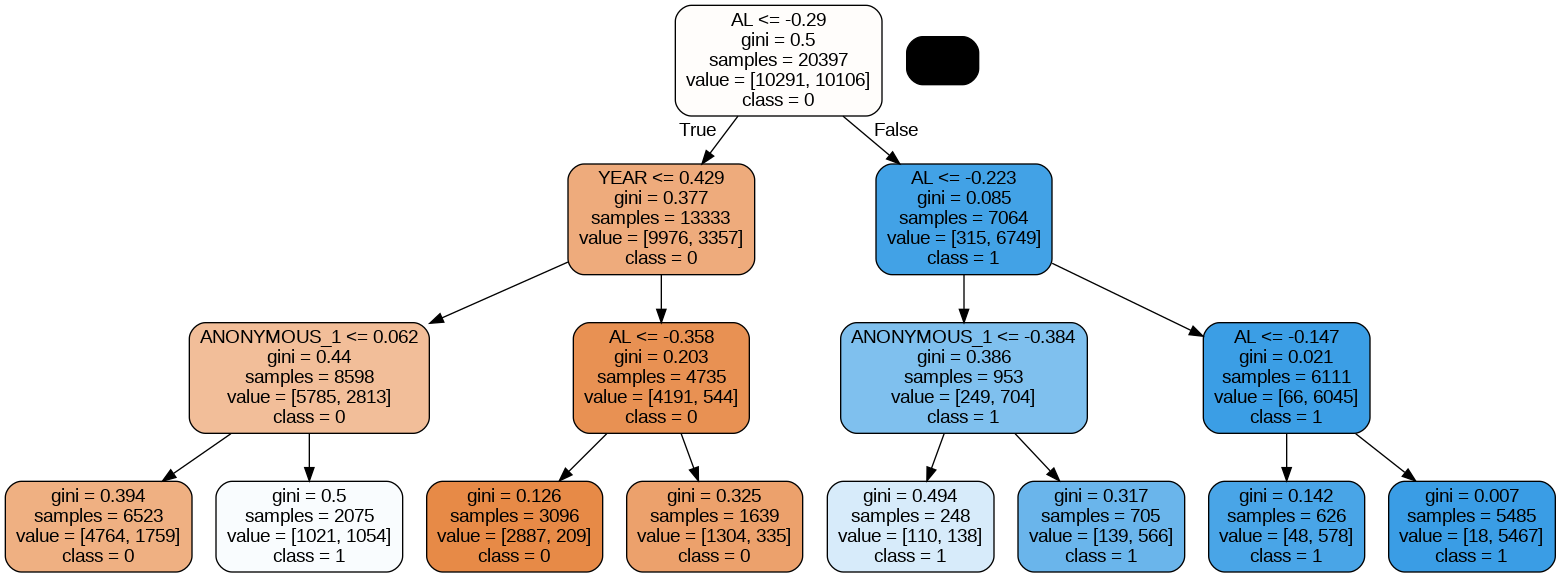

In [102]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data =export_graphviz(dtc, filled=True, rounded =True,
                          class_names =['0','1'],
                          feature_names=X_train.columns,
                          out_file=None)

graph =graph_from_dot_data(dot_data)
graph.write_png('tree_depth3.png')

from IPython.display import Image
Image(graph.create_png())

# SVM
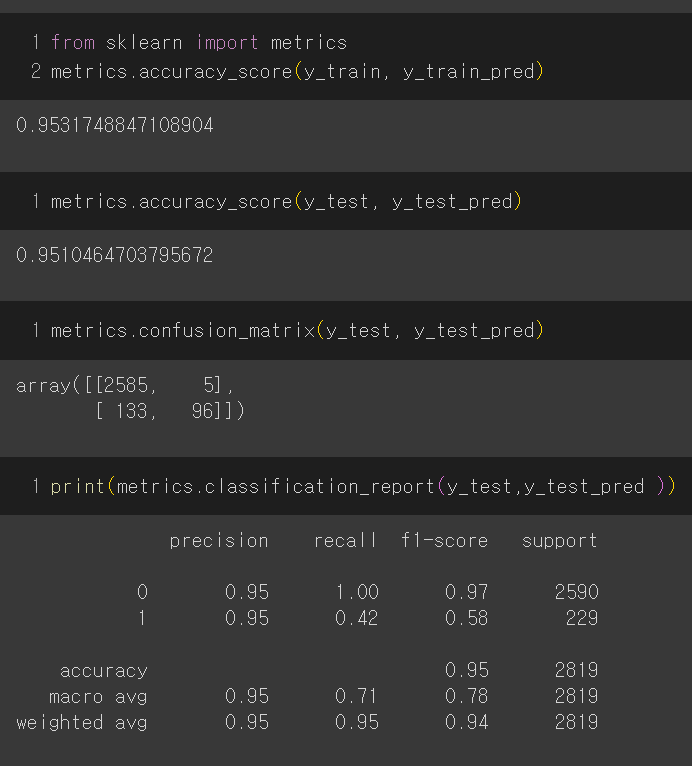

In [103]:
from sklearn.svm import SVC
svm =SVC(kernel='linear', C =1.0, random_state=1)
svm.fit(X_train_std, y_train)

y_train_pred =svm.predict(X_train_std)
y_test_pred =svm.predict(X_test_std)

In [104]:
print(svm.support_)
print(svm.n_support_)

[    3     5    12 ... 20380 20382 20389]
[3233 3217]


In [105]:
from sklearn import metrics
metrics.accuracy_score(y_train, y_train_pred)

0.8607638378192871

In [106]:
metrics.accuracy_score(y_test, y_test_pred)

0.8635294117647059

In [107]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[2531,   70],
       [ 626, 1873]])

In [108]:
print(metrics.classification_report(y_test,y_test_pred ))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2601
           1       0.96      0.75      0.84      2499

    accuracy                           0.86      5100
   macro avg       0.88      0.86      0.86      5100
weighted avg       0.88      0.86      0.86      5100



# Kernel SVM
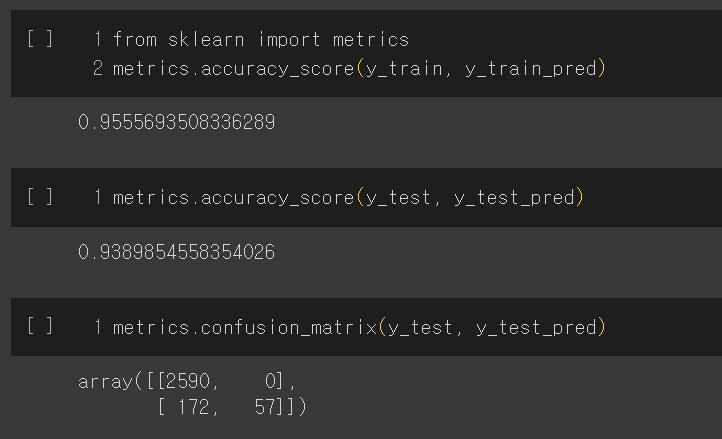

In [109]:
ksvm =SVC(kernel='rbf', C=1.0, gamma=0.2, random_state=42)
ksvm.fit(X_train_std, y_train)

y_train_pred =ksvm.predict(X_train_std)
y_test_pred =ksvm.predict(X_test_std)

In [110]:
from sklearn import metrics
metrics.accuracy_score(y_train, y_train_pred)

0.9538167377555523

In [111]:
metrics.accuracy_score(y_test, y_test_pred)

0.93

In [112]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[2464,  137],
       [ 220, 2279]])

In [113]:
print(ksvm.support_)
print(ksvm.n_support_)

[    3     4     8 ... 20382 20389 20396]
[5019 4059]


In [114]:
print(metrics.classification_report(y_test,y_test_pred ))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2601
           1       0.94      0.91      0.93      2499

    accuracy                           0.93      5100
   macro avg       0.93      0.93      0.93      5100
weighted avg       0.93      0.93      0.93      5100



# 차원축소

In [115]:
#고유값, 고유벡터 구하기
scov=np.cov(X_train_std.T)
eigen_vals, eigen_vecs=np.linalg.eig(scov) 
print('Eigenvalues Wn%s' %eigen_vals)

Eigenvalues Wn[5.28693307 3.40125551 2.21930596 1.62261943 1.51478422 0.07593269
 0.11032071 0.12235469 0.17636911 0.22426295 0.26695246 0.29625424
 0.39634689 0.47471858 0.49667918 0.51248731 1.28583801 1.24963488
 0.60658656 1.1863879  0.65018206 0.68079225 1.15835602 0.73812724
 0.7779935  0.80425586 0.84582935 1.0802978  0.87305196 0.91015498
 0.90665475 1.04648474 1.03781436 0.96328999 1.00243637 0.9823016
 0.99066492 1.02715101]


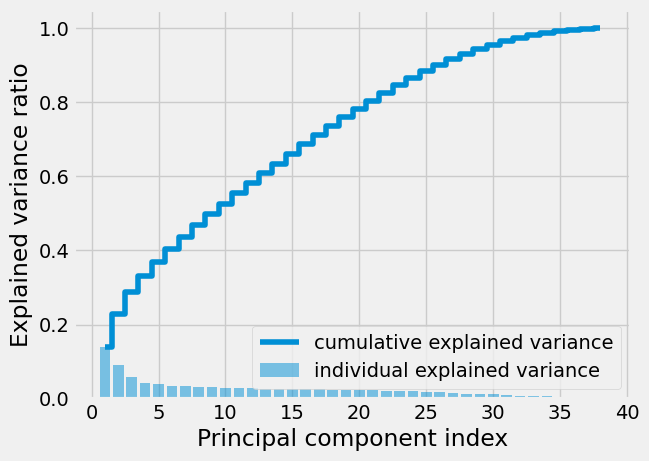

In [116]:
# Exolained var lance ratio
tot = sum(eigen_vals)
var_exp = [(i/ tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt 
plt.bar(range(1, 39), var_exp, alpha= 0.5, align= 'center' , label= 'individual explained variance')
plt.step(range (1,39), cum_var_exp, where= 'mid', label = 'cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt. show()


In [117]:
# PCA를 통해 차원 축소 후 로지스틱 회귀
from sklearn.linear_model import LogisticRegression 
from sklearn.decomposition import PCA
Ir=LogisticRegression()
Ipca = PCA(n_components =7)
X_train_pca = Ipca.fit_transform(X_train_std)
X_test_pca = Ipca.transform(X_test_std)
Ir.fit(X_train_pca, y_train) 
y_train_pre=Ir.predict(X_train_pca) 
y_test_pre=Ir.predict(X_test_pca)
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pre)) 
print(metrics.accuracy_score(y_test, y_test_pre))

0.7027013776535765
0.7029411764705882


In [118]:
print(Ipca.components_)
print(Ipca.explained_variance_ratio_)

[[-0.14887846 -0.11371605  0.25483035 -0.05032001  0.01667609 -0.03219996
  -0.00897459 -0.00347433  0.006554    0.07668706 -0.00620431  0.01838497
  -0.00628113 -0.03678406  0.02746317  0.20128302  0.16384861  0.11800469
   0.33027033  0.09216948  0.21230218  0.02903438 -0.03519489  0.31989657
  -0.09740518  0.09032959  0.29316471  0.08379797  0.00960465  0.21944529
   0.24663716  0.03941948  0.32437833  0.01141276  0.28261699  0.19503748
   0.23448964 -0.19933595]
 [ 0.29568518  0.06668922 -0.37116517  0.09464607 -0.01566519  0.00849644
  -0.00518451  0.0076864  -0.00393184  0.00609966  0.00800587  0.01360104
   0.01758529  0.04941323  0.040291    0.16529586  0.1006025   0.15791248
   0.10583275  0.01607384  0.17780207 -0.0224884   0.20149976  0.18598249
   0.24181006  0.12521009  0.16814808 -0.07473419  0.13582275  0.01624794
  -0.35903166  0.01383571  0.17576025  0.16053148  0.1875351   0.14571993
  -0.21841437  0.3982283 ]
 [ 0.35142344 -0.52531272  0.09113202 -0.0072703   0.00823